# EMOTION DETECTION USING ML FRAMEWORK

- STAGE 1: DATA EXPLORATION
- STAGE 2: FEATURE SELECTION
- STAGE 3: CLASSIFICATION ML MODELS
- STAGE 4: PERFORMANCE EVALUATION

The data was collected from two people (1 male, 1 female) for 3 minutes per state - positive, neutral, negative. Used a Muse EEG headband which recorded the TP9, AF7, AF8 and TP10 EEG placements via dry electrodes. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc

import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout,GRU
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import pyforest
lazy_imports()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 1000)

In [3]:
df_eeg= pd.read_csv('emotions.csv')

In [4]:
df_eeg.head(10)

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  mean_d_39_a  mean_d_40_a  mean_d_41_a  mean_d_42_a  mean_d_43_a  mean_d_44_a  mean_d_45_a  mean_d_46_a  mean_d_47_a  mean_d_48_a  mean_d_49_a  stddev_0_a  stddev_1_a  stddev_2_a  stddev_3_a  stddev_4_a  stddev_d_0_a  stddev_d_1_a  stddev_d_2_a  stddev_d_3_a  stddev_d_4_a  moments_0_a  moments_1_a  moments_2_a  moments_3_a  moments_4_a  moments_5_a  moments_6_a   moments_7_a  \
0        4.62      30.3    -356.0     15.60      26.3       1.070       0.411      -15.70        2.06       3.150         2.15         29.5       -353.0        14.40         21.5        5.98        30.7      -343.0       14.70        27.9        3.170         32.2       -368.0        15.90         36.4         7.08         28.8       -359.0        17.30         19.6      -3.8300       -1.230    -10.80000      -0.3630        -6.41       -1.030       -2.780       14.600       -1.540   -14.900000        -4.94        0.664        5.820       -2.920         1.90         2.80       -1.550        25.50       -1.180        -8.51       -1.110        1.890        16.60       -2.550       8.3100       -3.910        3.440       -8.820       -1.370       16.800        28.1        7.80      203.00       39.90        36.1        -1.690        -0.876        8.1200        -1.720         0.747      10000.0        57.40    4170000.0      40400.0       8750.0    1180000.0      11500.0  3.690000e+09   
1       28.80      33.1      32.0     25.80      22.8       6.550       1.680        2.88        3.83      -4.820        25.60         32.8         29.6        21.50         17.4       25.50        31.7        31.5       26.20        32.9       31.800         33.1         33.2        28.50         26.8        32.40         34.7         33.8        27.00         14.2       0.0342        1.100     -1.87000      -4.6900       -15.40       -6.220       -0.328       -3.530       -6.980    -9.370000        -6.85       -1.890       -4.130       -5.460         3.20        -6.25       -1.430        -1.65       -2.280         6.07       -6.880       -3.000        -2.26       -0.762      18.6000       -0.630       -1.560       -0.605        1.520       12.600         7.1        3.55       10.30        6.51        33.1        -0.525        -0.516       -1.9100        -1.670         0.315         21.8       -18.20       -344.0        -29.7     -10400.0       6690.0        473.0  3.180000e+04   
2        8.90      29.4    -416.0     16.70      23.7      79.900       3.360       90.20       89.90       2.030         7.75         30.1       -441.0         9.89         25.3      -68.90        25.3      -481.0      -65.40        20.0       79.800         31.0       -408.0        91.90         29.5        18.80         31.1       -335.0        32.20         19.9      76.6000        4.850     39.90000      75.3000         5.27      -72.000       -0.843      -33.000      -82.000    -4.200000       -11.00       -0.972     -106.000      -22.300         5.36      -149.00       -5.690       -72.90     -157.000        -9.48      -87.600       -5.820      -146.00      -97.600       0.0884       61.000       -0.129      -73.000       59.800        9.560        70.4        4.12      167.00       71.50        30.6       -34.200        -2.280       23.0000       -36.700         0.450    -387000.0       -89.00    -937000.0    -428000.0      -5670.0  104000000.0       1470.0  1.990000e+09   
3       14.90  

## Stage 1: Data Exploration

In [5]:
df_eeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [6]:
df_eeg.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a', 'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b', 'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'], dtype='object', length=2549)

### PLOT FOR MEAN VALUES

#### SIGNAL A

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  mean_d_39_a  mean_d_40_a  mean_d_41_a  mean_d_42_a  mean_d_43_a  mean_d_44_a  mean_d_45_a  mean_d_46_a  mean_d_47_a  mean_d_48_a  mean_d_49_a
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411      -15.70        2.06        3.15         2.15         29.5       -353.0        14.40         21.5        5.98        30.7      -343.0        14.7        27.9         3.17         32.2       -368.0         15.9         36.4         7.08         28.8       -359.0         17.3         19.6      -3.8300       -1.230    -10.80000       -0.363        -6.41        -1.03       -2.780        14.60       -1.540   -14.900000        -4.94        0.664         5.82       -2.920         1.90         2.80       -1.550        25.50        -1.18        -8.51       -1.110        1.890        16.60       -2.550       8.3100        -3.91        3.440       -8.820       -1.370       16.800
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680        2.88        3.83       -4.82        25.60         32.8         29.6        21.50         17.4       25.50        31.7        31.5        26.2        32.9        31.80         33.1         33.2         28.5         26.8        32.40         34.7         33.8         27.0         14.2       0.0342        1.100     -1.87000       -4.690       -15.40        -6.22       -0.328        -3.53       -6.980    -9.370000        -6.85       -1.890        -4.13       -5.460         3.20        -6.25       -1.430        -1.65        -2.28         6.07       -6.880       -3.000        -2.26       -0.762      18.6000        -0.63       -1.560       -0.605        1.520       12.600
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360       90.20       89.90        2.03         7.75         30.1       -441.0         9.89         25.3      -68.90        25.3      -481.0       -65.4        20.0        79.80         31.0       -408.0         91.9         29.5        18.80         31.1       -335.0         32.2         19.9      76.6000        4.850     39.90000       75.300         5.27       -72.00       -0.843       -33.00      -82.000    -4.200000       -11.00       -0.972      -106.00      -22.300         5.36      -149.00       -5.690       -72.90      -157.00        -9.48      -87.600       -5.820      -146.00      -97.600       0.0884        61.00       -0.129      -73.000       59.800        9.560
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284        8.82        2.30       -1.97        17.30         32.0       -148.0        20.40         22.8       13.20        31.5      -147.0        16.9        27.7        15.70         30.7       -142.0         20.7         22.8        13.60         32.2       -135.0         21.2         23.8       4.1500        0.556     -0.35400        3.460        -4.96         1.63        1.330        -5.83       -0.298     0.000777         3.71       -0.176       -12.10       -0.784        -1.07        -2.52        0.771        -5.48        -3.75         4.96       -0.435       -0.733       -11.70       -4.240       3.8900         2.08       -1.500       -6.250       -0.486       -1.070
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790        3.06       41.40        5.52        26.10         34.3         43.7        23.70         20.6       -3.87        34.1      

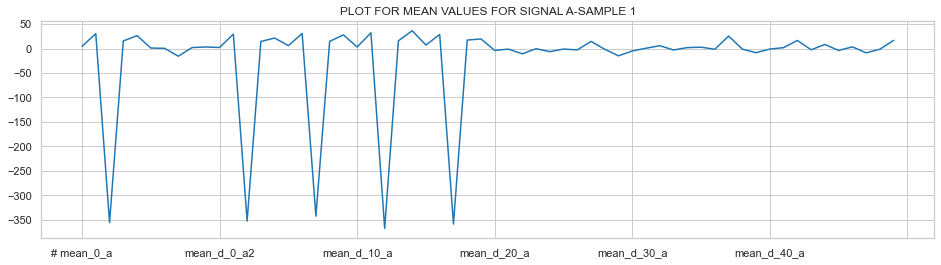

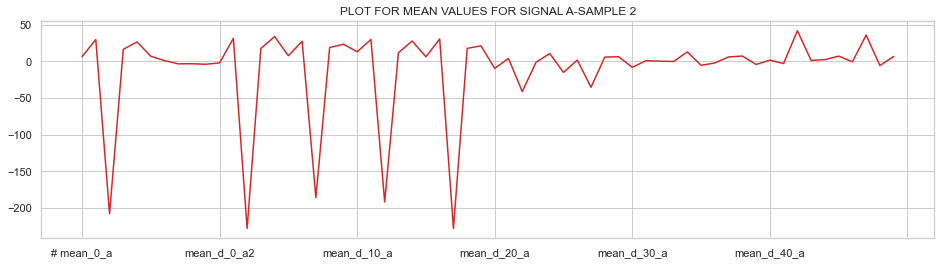

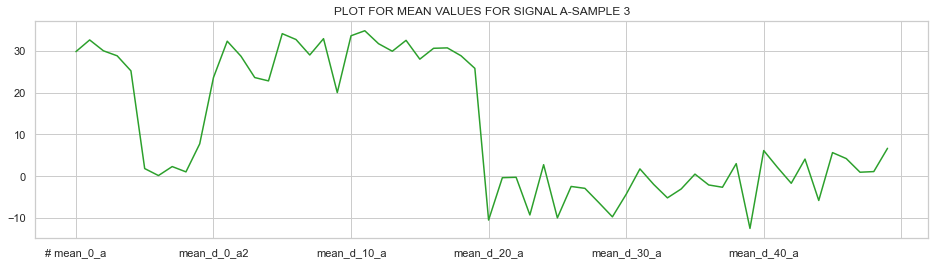

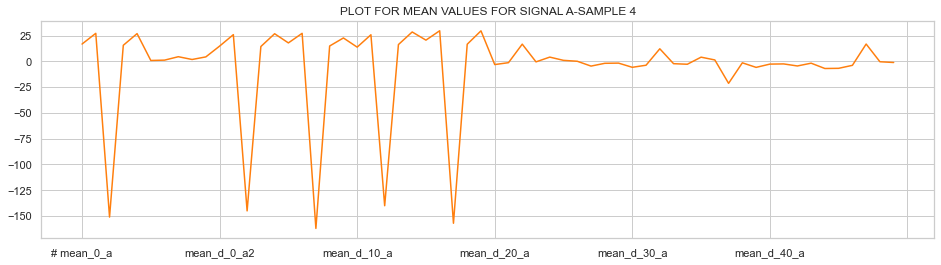

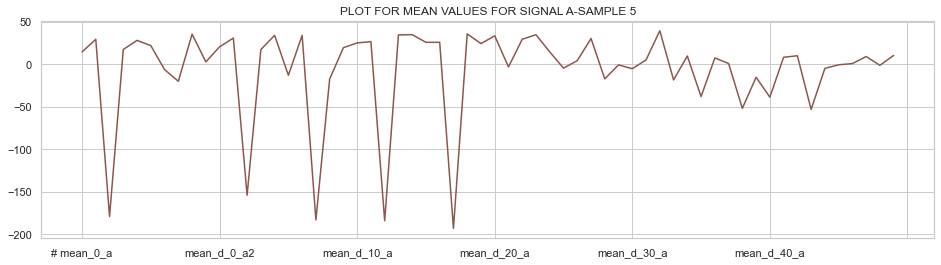

In [81]:
#Forming a seperate dataframe for only mean columns for signal A
mean_a_data= df_eeg.loc[:,'# mean_0_a':'mean_d_49_a']

mean_a_data.head()

#SAMPLE 1- SIGNAL A
mean_a_data.iloc[0,:].plot(figsize=(16,4),title='PLOT FOR MEAN VALUES FOR SIGNAL A-SAMPLE 1', color='tab:blue')
plt.show()

#SAMPLE 2-SIGNAL A
mean_a_data.iloc[200,:].plot(figsize=(16,4),title='PLOT FOR MEAN VALUES FOR SIGNAL A-SAMPLE 2',color='tab:red')
plt.show()

#SAMPLE 3-SIGNAL A
mean_a_data.iloc[500,:].plot(figsize=(16,4),title='PLOT FOR MEAN VALUES FOR SIGNAL A-SAMPLE 3',color='tab:green')
plt.show()

#SAMPLE 4-SIGNAL A
mean_a_data.iloc[1000,:].plot(figsize=(16,4),title='PLOT FOR MEAN VALUES FOR SIGNAL A-SAMPLE 4',color='tab:orange')
plt.show()

#SAMPLE 5-SIGNAL A
mean_a_data.iloc[1600,:].plot(figsize=(16,4),title='PLOT FOR MEAN VALUES FOR SIGNAL A-SAMPLE 5',color='tab:brown')
plt.show()

#### SIGNAL B

mean_0_b  mean_1_b  mean_2_b  mean_3_b  mean_4_b  mean_d_0_b  mean_d_1_b  mean_d_2_b  mean_d_3_b  mean_d_4_b  mean_d_0_b2  mean_d_1_b2  mean_d_2_b2  mean_d_3_b2  mean_d_4_b2  mean_d_5_b  mean_d_6_b  mean_d_7_b  mean_d_8_b  mean_d_9_b  mean_d_10_b  mean_d_11_b  mean_d_12_b  mean_d_13_b  mean_d_14_b  mean_d_15_b  mean_d_16_b  mean_d_17_b  mean_d_18_b  mean_d_19_b  mean_d_20_b  mean_d_21_b  mean_d_22_b  mean_d_23_b  mean_d_24_b  mean_d_25_b  mean_d_26_b  mean_d_27_b  mean_d_28_b  mean_d_29_b  mean_d_30_b  mean_d_31_b  mean_d_32_b  mean_d_33_b  mean_d_34_b  mean_d_35_b  mean_d_36_b  mean_d_37_b  mean_d_38_b  mean_d_39_b  mean_d_40_b  mean_d_41_b  mean_d_42_b  mean_d_43_b  mean_d_44_b  mean_d_45_b  mean_d_46_b  mean_d_47_b  mean_d_48_b  mean_d_49_b
0      3.84      30.4    -351.0      15.6      26.1      -2.730      -0.222       25.40      -1.900       -3.84         3.31         32.4       -368.0         15.8         36.8        7.04        28.8      -359.0        17.3        19.5         1.04         29.8       -344.0         15.2         19.0        3.880         30.8       -333.0         14.2         29.2       -3.730        3.590       -9.240       -1.450        17.30         2.28        2.590       -24.40        0.632       17.700       -0.567        1.510       -35.60        1.680         7.58        6.010        -1.00       -15.20        2.080        0.459        3.160       -2.080      -26.300        3.130       -9.680        -2.84       -1.080      -11.100         1.05       -10.10
1     28.50      32.5      34.5      26.3      23.0      -7.170      -2.710        2.02      -2.890        4.98        31.80         33.1         33.2         28.5         27.3       32.40        34.7        33.7        27.0        14.0        28.00         32.2         35.5         26.4         26.7       22.000         30.2         35.4         23.3         24.4       -0.607       -1.600       -0.558        1.480        13.30         3.83        0.859        -2.38        2.090        0.612        9.820        2.910        -2.22        5.150         2.90        4.440         2.46        -1.82        0.605      -12.700       10.400        4.510       -1.660        3.670      -10.400         5.99        2.050        0.162         3.07         2.28
2     27.50      30.3    -342.0      37.7      23.7     -42.300      -1.530       58.10     -47.400       -1.42        79.30         31.0       -408.0         91.5         29.2       18.80        31.1      -335.0        32.2        19.8        11.90         28.4       -291.0         18.0         25.8        0.963         30.5       -334.0         10.2         20.2       60.600       -0.125      -72.600       59.300         9.41        67.40        2.540      -117.00       73.500        3.330       78.400        0.430       -73.60       81.300         8.95        6.830         2.67       -44.20       14.200       -6.070       17.800        0.555       -0.977       21.900       -0.452        11.00       -2.110       43.200         7.75         5.62
3     14.90      30.9    -111.0      20.6      25.5       0.584      -1.120       55.50      -0.739        4.62        15.70         30.7       -141.0         20.8         22.3       13.60        32.2      -136.0        21.2        24.0        14.10         29.9       -121.0         19.6         20.2       16.300         30.8        -45.7         20.9         35.2        2.130       -1.540       -5.330       -0.436        -1.74         1.61        0.791       -20.00        1.170        2.130       -0.589       -0.103       -95.30       -0.119       -12.90       -0.522         2.33       -14.70        1.610        3.870       -2.720        1.440      -90.000        0.317      -11.200        -2.20       -0.893      -75.300        -1.29       -15.10
4     33.70      33.6      84.5      28.2      26.2     -23.700      10.400       75.50     -39.400       -1.98        59.00         26.7         60.2         64.5         26.7       32.40        30.1        33.6      

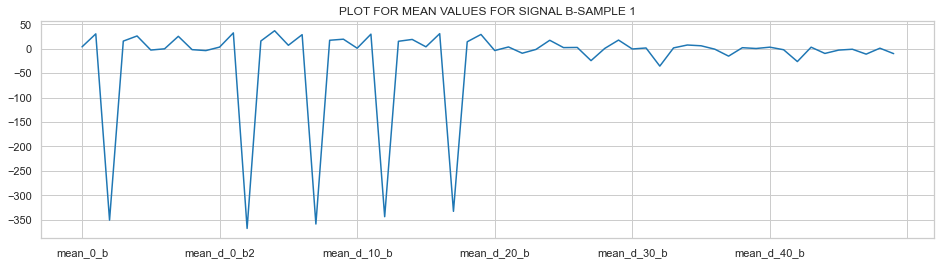

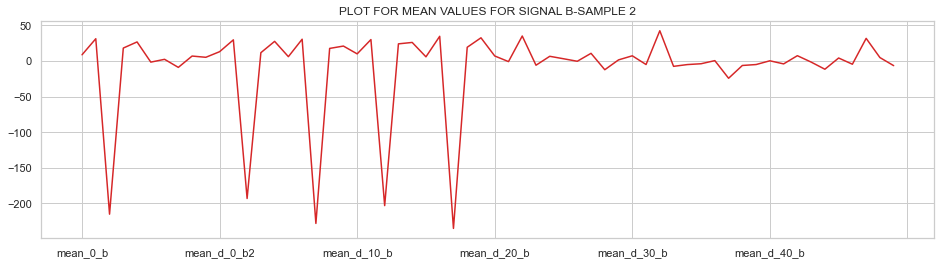

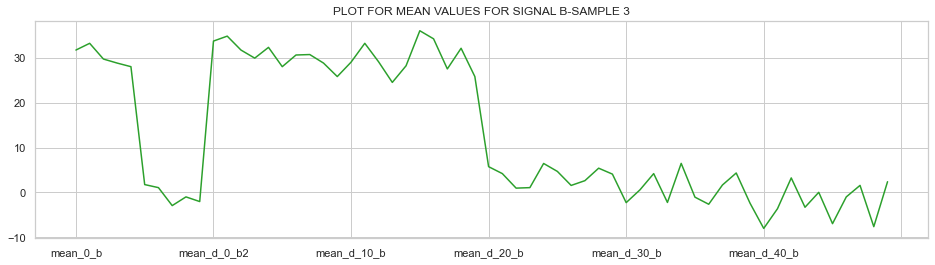

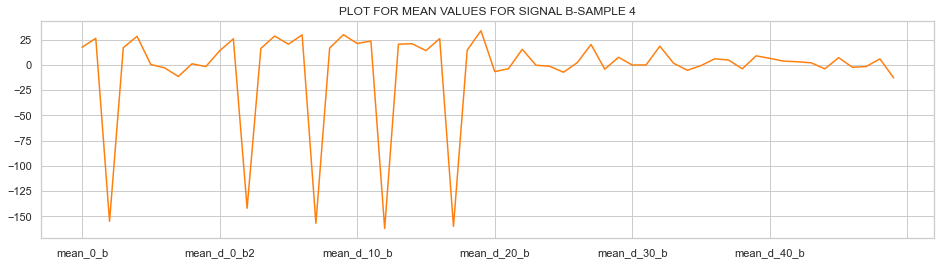

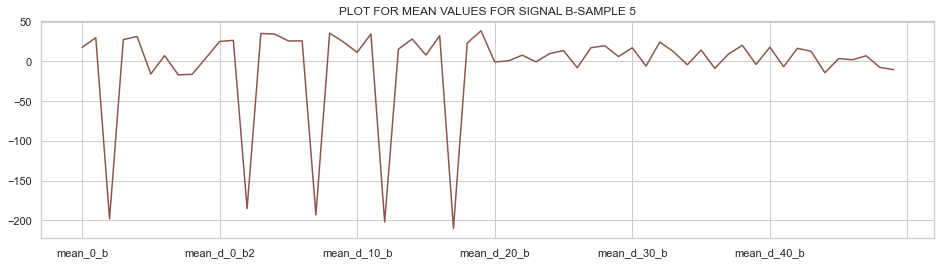

In [82]:
#Forming a seperate dataframe for only mean columns for signal B
mean_b_data= df_eeg.loc[:,'mean_0_b':'mean_d_49_b']

mean_b_data.head()

#SAMPLE 1- SIGNAL B
mean_b_data.iloc[0,:].plot(figsize=(16,4),title='PLOT FOR MEAN VALUES FOR SIGNAL B-SAMPLE 1', color='tab:blue')
plt.show()

#SAMPLE 2-SIGNAL B
mean_b_data.iloc[200,:].plot(figsize=(16,4),title='PLOT FOR MEAN VALUES FOR SIGNAL B-SAMPLE 2',color='tab:red')
plt.show()

#SAMPLE 3-SIGNAL B
mean_b_data.iloc[500,:].plot(figsize=(16,4),title='PLOT FOR MEAN VALUES FOR SIGNAL B-SAMPLE 3',color='tab:green')
plt.show()

#SAMPLE 4-SIGNAL B
mean_b_data.iloc[1000,:].plot(figsize=(16,4),title='PLOT FOR MEAN VALUES FOR SIGNAL B-SAMPLE 4',color='tab:orange')
plt.show()

#SAMPLE 5-SIGNAL B
mean_b_data.iloc[1600,:].plot(figsize=(16,4),title='PLOT FOR MEAN VALUES FOR SIGNAL B-SAMPLE 5',color='tab:brown')
plt.show()

### PLOT FOR MIN VALUES

#### SIGNAL A

min_0_a  min_1_a  min_2_a  min_3_a  min_4_a  min_d_0_a  min_d_1_a  min_d_2_a  min_d_3_a  min_d_4_a  min_q_0_a  min_q_1_a  min_q_2_a  min_q_3_a  min_q_4_a  min_q_5_a  min_q_6_a  min_q_7_a  min_q_8_a  min_q_9_a  min_q_10_a  min_q_11_a  min_q_12_a  min_q_13_a  min_q_14_a  min_q_15_a  min_q_16_a  min_q_17_a  min_q_18_a  min_q_19_a  min_q_20_a  min_q_21_a  min_q_22_a  min_q_23_a  min_q_24_a  min_q_25_a  min_q_26_a  min_q_27_a  min_q_28_a  min_q_29_a  min_q_30_a  min_q_31_a  min_q_32_a  min_q_33_a  min_q_34_a  min_q_35_a  min_q_36_a  min_q_37_a  min_q_38_a  min_q_39_a  min_q_40_a  min_q_41_a  min_q_42_a  min_q_43_a  min_q_44_a  min_q_45_a  min_q_46_a  min_q_47_a  min_q_48_a  min_q_49_a
0    -42.0     9.96 -727.000   -38.00    -79.5       5.51      3.810     -50.20       9.64      35.80     -42.00       9.96     -677.0     -38.00      -44.8      -42.0       15.4   -676.000     -33.30      -79.5       -36.5        15.6      -698.0      -28.00       -39.5       -31.5        13.8     -727.00      -28.40       -43.6     -0.0607      -5.400     -0.0992       -4.76        34.7       -5.51       -5.69       21.50       -9.98       -5.22      -10.60      -3.810      50.200       -9.64       -1.14       -5.44      -0.284       21.60       -5.22    -39.9000    -10.5000       1.590       50.30       -4.87       -35.8       -5.07       1.870       28.70      0.3430        4.08
1     13.6    22.60   -0.705     7.49    -70.2       7.19      3.800      12.70       5.61      -3.55      13.60      25.10       11.1       7.49      -66.7       13.8       22.6     -0.705      14.90      -24.5        20.8        26.4        16.3       13.10       -70.2        20.9        27.9       12.00       17.30       -52.5     -0.1820       2.550     11.8000       -7.44       -42.1       -7.19       -1.25       -5.14       -5.61        3.55       -7.31      -2.780      -0.844       -9.80      -14.10       -7.01      -3.800      -17.00        1.83     45.7000     -7.1300      -5.330      -12.70       -2.36        28.0       -0.12      -1.530        4.30     -4.1900      -17.70
2   -206.0    14.80 -844.000  -186.00    -71.9     195.00     10.200      17.40     205.00      35.00     -21.80      21.00     -707.0      -6.29      -45.6     -206.0       14.8   -844.000    -186.00      -71.9        18.3        25.0      -826.0       44.00       -23.5       -11.1        26.5     -822.00       19.00       -36.8    185.0000       6.190    137.0000      180.00        26.2      -40.20       -4.02      119.00      -50.30      -22.20      -10.70      -5.500     115.000      -25.30       -8.80     -225.00     -10.200      -17.40     -230.00    -48.4000   -195.0000     -11.700      -21.60     -205.00       -35.0       29.40      -1.480       -4.27     25.0000       13.40
3    -23.5    25.10 -819.000    -6.21    -53.7       2.50     -0.953      -5.32      10.20     -16.80     -23.50      26.70     -671.0      -4.20      -27.4      -21.1       26.0   -813.000      -6.21      -36.9       -13.7        25.1      -819.0        4.09       -36.9       -21.0        25.9     -712.00        4.03       -53.7     -2.4600       0.709    142.0000        2.01         9.5       -9.84        1.66      148.00       -8.29        9.55       -2.50       0.866      40.500       -8.23       26.30       -7.38       0.953        5.32      -10.30      0.0464     -0.0411       0.157     -102.00      -10.20        16.8        7.34      -0.796     -107.00      0.0574       16.80
4   -161.0    18.60   -9.640  -169.00    -72.7     112.00     -1.350      -4.16      99.80      30.40       5.38      28.90       12.2      -8.47      -62.5     -161.0       20.0     -5.480    -169.00      -72.7        19.6        18.6        20.1       20.70       -26.5       -49.1        20.1       -9.64      -69.30       -42.3    166.0000       8.920     17.7000      161.00        10.1      -14.20       10.30       -7.92      -29.20      -36.00       54.50       8.790      21.900       60.80      -20.20     -181.00       1.350      -2

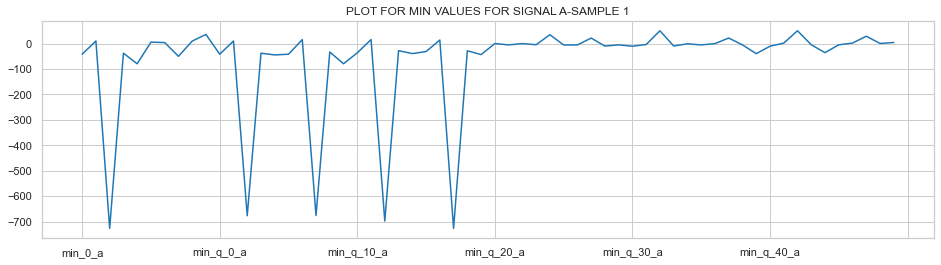

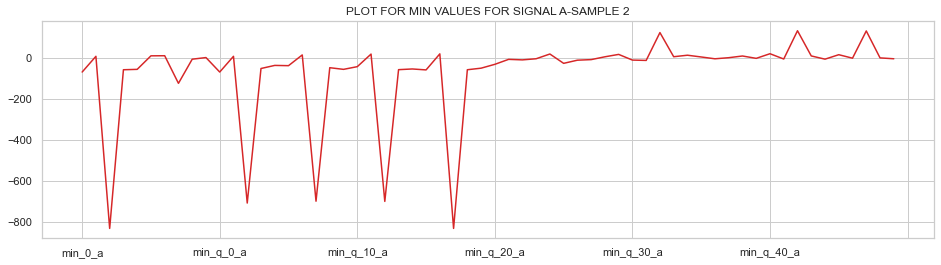

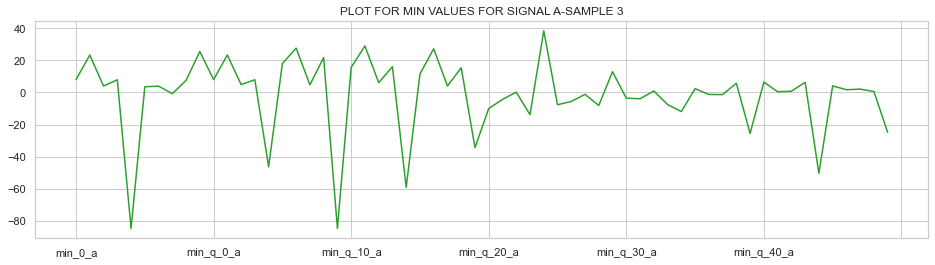

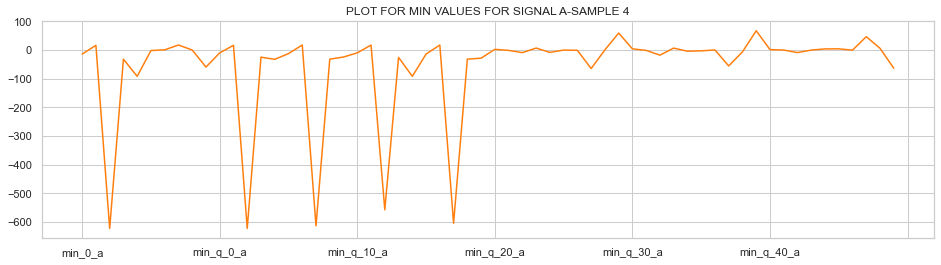

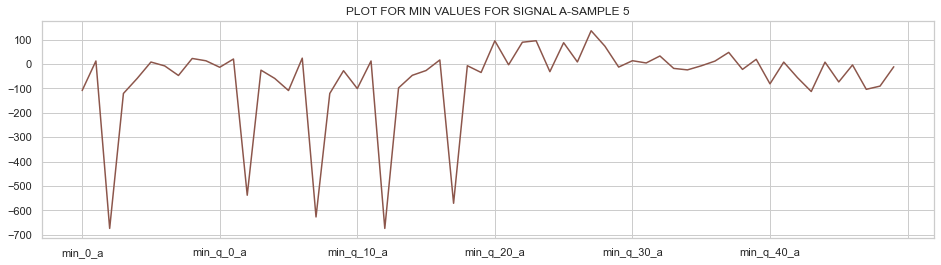

In [83]:
#Forming a seperate dataframe for only mean columns for signal A
min_a_data= df_eeg.loc[:,'min_0_a':'min_q_49_a']

min_a_data.head()

#SAMPLE 1- SIGNAL A
min_a_data.iloc[0,:].plot(figsize=(16,4),title='PLOT FOR MIN VALUES FOR SIGNAL A-SAMPLE 1',color='tab:blue')
plt.show()

#SAMPLE 2-SIGNAL A
min_a_data.iloc[200,:].plot(figsize=(16,4),title='PLOT FOR MIN VALUES FOR SIGNAL A-SAMPLE 2',color='tab:red')
plt.show()

#SAMPLE 3-SIGNAL A
min_a_data.iloc[500,:].plot(figsize=(16,4),title='PLOT FOR MIN VALUES FOR SIGNAL A-SAMPLE 3',color='tab:green')
plt.show()

#SAMPLE 4-SIGNAL A
min_a_data.iloc[1000,:].plot(figsize=(16,4),title='PLOT FOR MIN VALUES FOR SIGNAL A-SAMPLE 4',color='tab:orange')
plt.show()

#SAMPLE 5-SIGNAL A
min_a_data.iloc[1600,:].plot(figsize=(16,4),title='PLOT FOR MIN VALUES FOR SIGNAL A-SAMPLE 5',color='tab:brown')
plt.show()

#### SIGNAL B

min_0_b  min_1_b  min_2_b  min_3_b  min_4_b  min_d_0_b  min_d_1_b  min_d_2_b  min_d_3_b  min_d_4_b  min_q_0_b  min_q_1_b  min_q_2_b  min_q_3_b  min_q_4_b  min_q_5_b  min_q_6_b  min_q_7_b  min_q_8_b  min_q_9_b  min_q_10_b  min_q_11_b  min_q_12_b  min_q_13_b  min_q_14_b  min_q_15_b  min_q_16_b  min_q_17_b  min_q_18_b  min_q_19_b  min_q_20_b  min_q_21_b  min_q_22_b  min_q_23_b  min_q_24_b  min_q_25_b  min_q_26_b  min_q_27_b  min_q_28_b  min_q_29_b  min_q_30_b  min_q_31_b  min_q_32_b  min_q_33_b  min_q_34_b  min_q_35_b  min_q_36_b  min_q_37_b  min_q_38_b  min_q_39_b  min_q_40_b  min_q_41_b  min_q_42_b  min_q_43_b  min_q_44_b  min_q_45_b  min_q_46_b  min_q_47_b  min_q_48_b  min_q_49_b
0   -45.80     13.7   -727.0   -33.00    -41.7      -10.3     -0.119      26.90      -4.38        1.5      -35.6       16.8     -702.0     -27.90      -36.9      -31.5       13.8     -727.0     -28.70      -41.7       -45.8        18.9      -700.0      -33.00       -40.2      -41.60        13.7      -658.0      -30.30       -26.7      -4.050       2.940       24.90       0.818        4.84       10.30       -2.17       -1.94        5.19        3.34        6.02        3.06      -44.00       2.400      -10.20      14.300       -5.11      -26.90        4.38        -1.5        10.1       0.119      -68.90      1.5800      -15.00       -4.25      5.2300      -42.10      -2.790      -13.50
1     7.96     24.3     12.7    12.80    -64.9      -12.6     -2.110       0.81       2.03       21.7       20.6       26.4       16.0      12.80      -64.9       20.9       27.9       12.7      17.50      -51.0        16.0        24.7        17.7       15.80       -39.3        7.96        24.3        13.5       14.80       -43.3      -0.348      -1.520        3.34      -4.740      -13.90        4.54        1.72       -1.73       -2.98      -25.70       12.60        2.11        2.53      -2.030      -21.70       4.890        3.24       -5.06        1.76       -11.7        13.0       3.630       -0.81      2.7100       -7.72        8.07      0.3940        4.25       0.954        4.00
2   -32.00     21.9   -814.0    -4.90    -58.9      -20.5     -3.240      70.50     -24.10      -20.5       18.4       25.1     -814.0      43.90      -25.0      -11.5       26.3     -803.0      19.20      -38.4       -19.0        21.9      -610.0       -3.86       -55.0      -32.00        23.6      -743.0       -4.90       -58.9      30.000      -1.180      -10.50      24.700       13.40       37.40        3.24     -204.00       47.80       30.00       50.40        1.55      -70.50      48.800       33.90       7.420        4.42     -194.00       23.10        16.6        20.5       2.730      -60.00     24.1000       20.50       13.00     -1.6900      134.00       1.040        3.91
3   -24.50     23.5   -820.0    -0.61    -51.2       -3.4     -1.530     236.00      -4.72        6.2      -13.2       25.0     -820.0       4.36      -41.9      -21.1       25.8     -718.0       4.11      -51.2       -22.1        23.6      -584.0       -0.61       -45.0      -24.50        23.5      -552.0        4.05       -33.3       7.950      -0.804     -102.00       0.245        9.31        8.89        1.48     -236.00        4.97        3.11       11.40        1.53     -268.00       0.306       -8.65       0.938        2.29     -134.00        4.72        -6.2         3.4       2.330     -166.00      0.0609      -18.00        2.46      0.0448      -32.40      -4.660      -11.80
4   -84.40     17.5    -36.0  -124.00    -59.6      -40.0     -1.230     -23.70     -61.50      -18.5       19.1       18.7       19.4      21.10      -36.1      -44.4       20.2      -12.3     -62.60      -41.0       -84.4        24.5       -36.0     -124.00       -24.2       11.00        17.5         7.6        8.83       -59.6      63.400      -1.520       31.70      83.700        4.96      103.00       -5.84       55.40      145.00      -11.90        8.06        1.23       11.80      12.300       23.50      40.000       -4.32       2

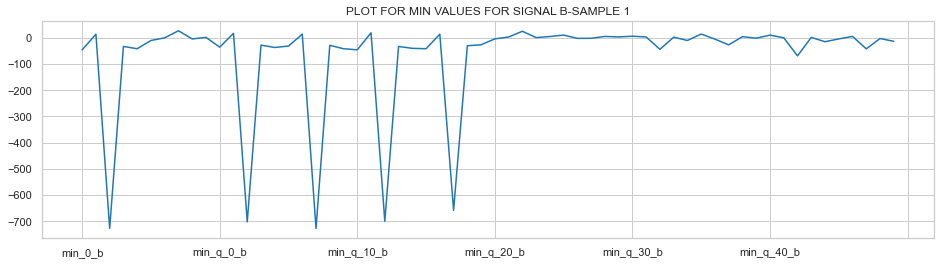

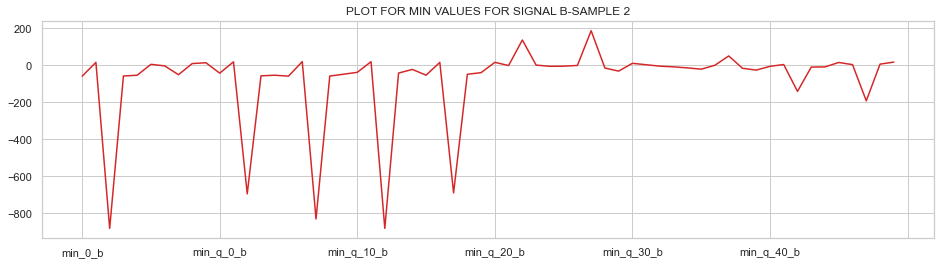

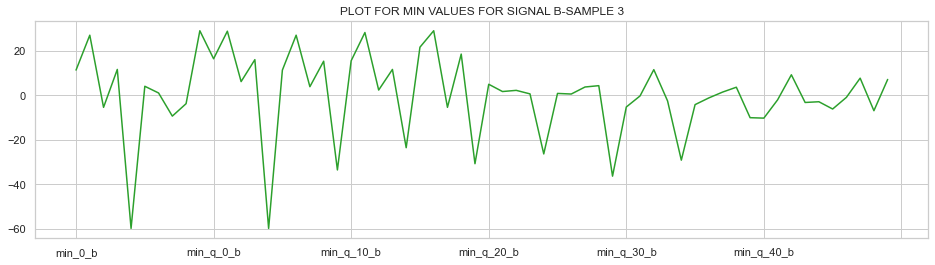

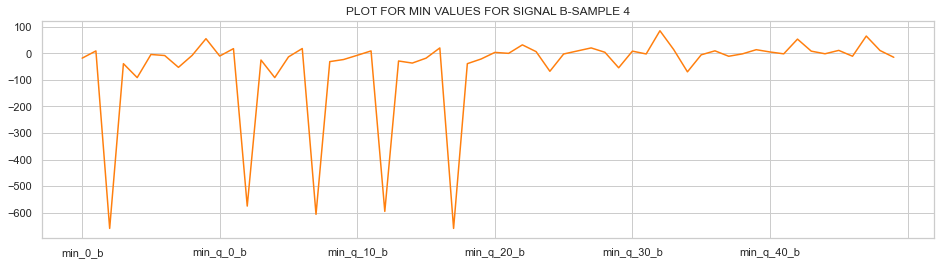

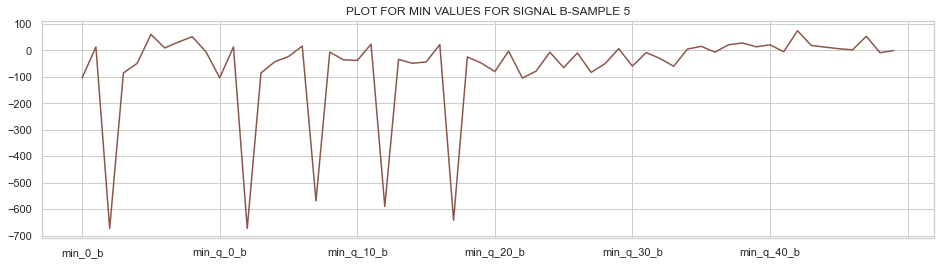

In [84]:
#Forming a seperate dataframe for only mean columns for signal B
min_b_data= df_eeg.loc[:,'min_0_b':'min_q_49_b']

min_b_data.head()

#SAMPLE 1- SIGNAL B
min_b_data.iloc[0,:].plot(figsize=(16,4),title='PLOT FOR MIN VALUES FOR SIGNAL B-SAMPLE 1',color='tab:blue')
plt.show()

#SAMPLE 2-SIGNAL B
min_b_data.iloc[200,:].plot(figsize=(16,4),title='PLOT FOR MIN VALUES FOR SIGNAL B-SAMPLE 2',color='tab:red')
plt.show()

#SAMPLE 3-SIGNAL B
min_b_data.iloc[500,:].plot(figsize=(16,4),title='PLOT FOR MIN VALUES FOR SIGNAL B-SAMPLE 3',color='tab:green')
plt.show()

#SAMPLE 4-SIGNAL B
min_b_data.iloc[1000,:].plot(figsize=(16,4),title='PLOT FOR MIN VALUES FOR SIGNAL B-SAMPLE 4',color='tab:orange')
plt.show()

#SAMPLE 5-SIGNAL B
min_b_data.iloc[1600,:].plot(figsize=(16,4),title='PLOT FOR MIN VALUES FOR SIGNAL B-SAMPLE 5',color='tab:brown')
plt.show()

### PLOT FOR MAX VALUES

#### SIGNAL A

max_0_a  max_1_a  max_2_a  max_3_a  max_4_a  max_d_0_a  max_d_1_a  max_d_2_a  max_d_3_a  max_d_4_a  max_q_0_a  max_q_1_a  max_q_2_a  max_q_3_a  max_q_4_a  max_q_5_a  max_q_6_a  max_q_7_a  max_q_8_a  max_q_9_a  max_q_10_a  max_q_11_a  max_q_12_a  max_q_13_a  max_q_14_a  max_q_15_a  max_q_16_a  max_q_17_a  max_q_18_a  max_q_19_a  max_q_20_a  max_q_21_a  max_q_22_a  max_q_23_a  max_q_24_a  max_q_25_a  max_q_26_a  max_q_27_a  max_q_28_a  max_q_29_a  max_q_30_a  max_q_31_a  max_q_32_a  max_q_33_a  max_q_34_a  max_q_35_a  max_q_36_a  max_q_37_a  max_q_38_a  max_q_39_a  max_q_40_a  max_q_41_a  max_q_42_a  max_q_43_a  max_q_44_a  max_q_45_a  max_q_46_a  max_q_47_a  max_q_48_a  max_q_49_a
0     61.4     52.0    131.0     93.6    137.0      0.959       2.73     -94.20      -9.62      -5.81       53.9       49.3      131.0       93.6      137.0       60.4       43.9       16.5       82.7      105.0        57.3        52.0        21.9        83.4       102.0        61.4        50.0        36.5        84.0       131.0       -6.54       5.340      114.00       10.90       31.90      -3.450       -2.73      109.00       10.30       34.40       -7.50      -0.702       94.20        9.62        5.81        3.10       -8.07       -5.38      -0.672        2.46      -0.959      -6.040      -20.00      -1.310      -26.10       -4.06        2.03      -14.60      -0.635     -28.600
1     45.4     41.6     52.6     42.8     96.3      1.150      -2.14       1.62      -2.31      -6.09       44.2       40.0       48.1       42.8       63.5       34.8       41.6       50.9       37.1       96.3        43.8        39.0        49.4        40.5        90.2        45.4        39.4        52.6        37.6        89.7        9.45      -1.550       -2.82        5.74      -32.80       0.409        1.07       -1.27        2.31      -26.70       -1.15       0.593       -4.44        5.21      -26.20       -9.04        2.62        1.55      -3.430        6.09     -10.600       2.140       -1.62      -0.526        6.53       -1.56       -0.48       -3.17       2.900       0.442
2    129.0     38.0    -43.9    127.0    103.0     35.900       1.89     118.00      36.50      23.60       32.6       36.1     -178.0       24.6       78.2       92.6       32.9     -162.0       90.7       79.4       129.0        34.9       -43.9       127.0        84.1        51.2        38.0      -127.0        48.2       103.0      -60.00       3.200      -16.50      -66.10       -1.19     -96.000        1.26     -134.00     -103.00       -5.96      -18.60      -1.890      -51.50      -23.70      -24.70      -35.90       -1.94     -118.00     -36.500       -4.77      41.400      -5.100      -35.00      42.400      -23.60       77.40       -3.15       82.60      79.000     -18.800
3     52.2     42.2    189.0     42.9    100.0     -8.210       5.20      28.80      -1.18      -8.39       52.2       36.4      149.0       37.0       95.5       43.0       37.0      160.0       42.9      100.0        41.8        42.2       189.0        35.1        91.7        44.0        36.8       152.0        41.7        73.2        9.20      -0.558      -10.90       -5.93       -4.60      10.400       -5.76      -39.60        1.89        3.78        8.21      -0.333       -2.43       -4.76       22.40        1.15       -5.20      -28.80       7.820        8.39      -0.988       0.224        8.45       1.180       27.00       -2.14        5.42       37.20      -6.650      18.600
4    126.0     52.6    102.0    121.0    119.0    -13.700      -3.71      13.50     -17.20       8.28       43.8       45.0       76.2       42.2       92.6      126.0       52.6       88.1      121.0      111.0       112.0        37.9       102.0       104.0       119.0        53.4        48.9        62.6        60.0        97.4      -81.80      -7.580      -11.90      -79.00      -18.50     -68.100        7.05      -25.30      -61.80      -26.70       -9.62      -3.870       13.60      -17.80       -4.81       13.70       14.60      -1

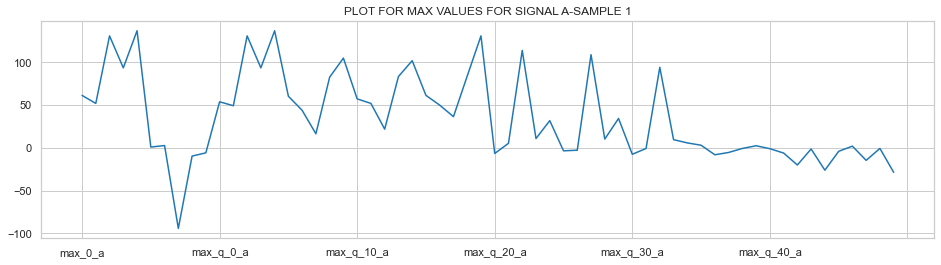

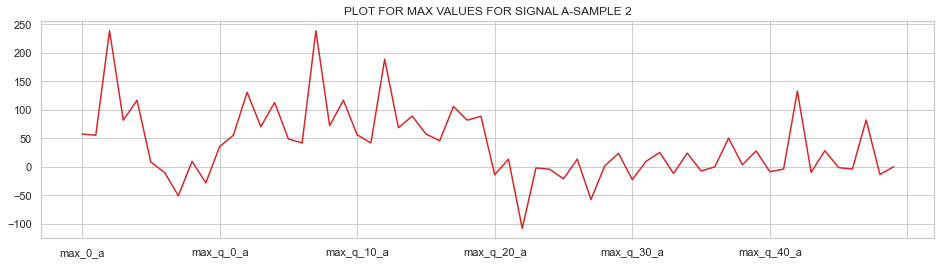

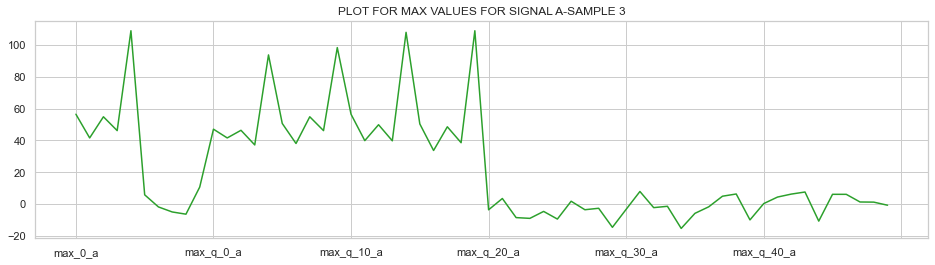

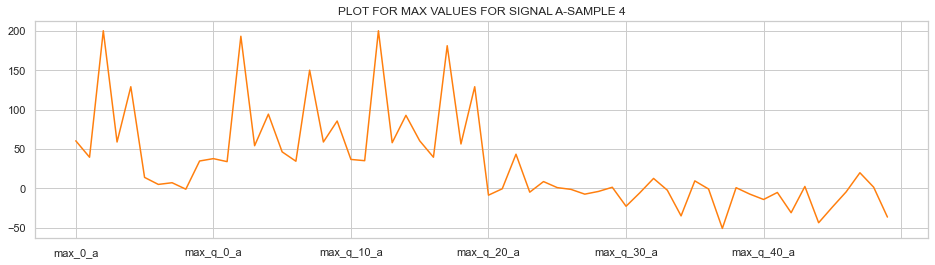

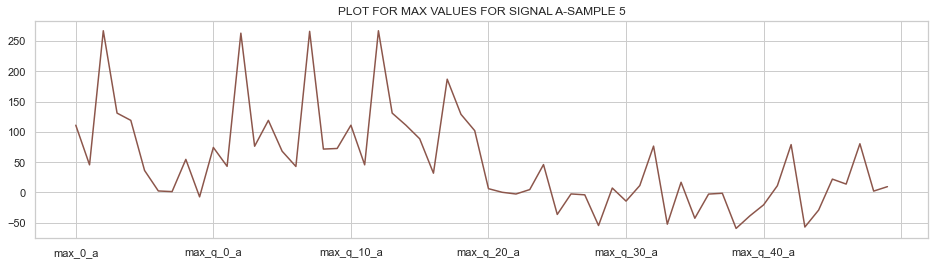

In [85]:
#Forming a seperate dataframe for only mean columns for signal A
max_a_data= df_eeg.loc[:,'max_0_a':'max_q_49_a']

max_a_data.head()

#SAMPLE 1- SIGNAL A
max_a_data.iloc[0,:].plot(figsize=(16,4),title='PLOT FOR MAX VALUES FOR SIGNAL A-SAMPLE 1',color='tab:blue')
plt.show()

#SAMPLE 2-SIGNAL A
max_a_data.iloc[200,:].plot(figsize=(16,4),title='PLOT FOR MAX VALUES FOR SIGNAL A-SAMPLE 2',color='tab:red')
plt.show()

#SAMPLE 3-SIGNAL A
max_a_data.iloc[500,:].plot(figsize=(16,4),title='PLOT FOR MAX VALUES FOR SIGNAL A-SAMPLE 3',color='tab:green')
plt.show()

#SAMPLE 4-SIGNAL A
max_a_data.iloc[1000,:].plot(figsize=(16,4),title='PLOT FOR MAX VALUES FOR SIGNAL A-SAMPLE 4',color='tab:orange')
plt.show()

max_a_data.iloc[1600,:].plot(figsize=(16,4),title='PLOT FOR MAX VALUES FOR SIGNAL A-SAMPLE 5',color='tab:brown')
plt.show()

#### SIGNAL B

max_0_b  max_1_b  max_2_b  max_3_b  max_4_b  max_d_0_b  max_d_1_b  max_d_2_b  max_d_3_b  max_d_4_b  max_q_0_b  max_q_1_b  max_q_2_b  max_q_3_b  max_q_4_b  max_q_5_b  max_q_6_b  max_q_7_b  max_q_8_b  max_q_9_b  max_q_10_b  max_q_11_b  max_q_12_b  max_q_13_b  max_q_14_b  max_q_15_b  max_q_16_b  max_q_17_b  max_q_18_b  max_q_19_b  max_q_20_b  max_q_21_b  max_q_22_b  max_q_23_b  max_q_24_b  max_q_25_b  max_q_26_b  max_q_27_b  max_q_28_b  max_q_29_b  max_q_30_b  max_q_31_b  max_q_32_b  max_q_33_b  max_q_34_b  max_q_35_b  max_q_36_b  max_q_37_b  max_q_38_b  max_q_39_b  max_q_40_b  max_q_41_b  max_q_42_b  max_q_43_b  max_q_44_b  max_q_45_b  max_q_46_b  max_q_47_b  max_q_48_b  max_q_49_b
0     68.6     51.8     86.2     86.1    129.0       7.26      -2.31      48.70       1.26      -35.9       54.4       51.8       19.0       83.3      109.0       61.3       49.9       37.5       84.8      129.0        53.6        37.4        68.4        86.1        93.0        68.6        49.5        86.2        85.3        86.5       -6.95       1.840      -18.50       -1.50      -19.60       0.777      14.400      -49.40       -2.76        16.3      -14.20       2.310      -67.20       -1.97       22.70        7.73      12.500      -30.90       -1.26       35.90       -7.26       0.472     -48.700       -0.47       42.40      -15.00     -12.000      -17.80       0.792       6.450
1     45.4     41.3     52.9     44.9    111.0      -3.59       1.83       1.37       4.72       18.5       43.9       39.1       49.1       40.1       92.8       45.4       39.4       51.5       37.4       82.9        41.8        41.3        52.9        44.9       111.0        39.3        40.8        50.6        34.2        90.7       -1.46      -0.338       -2.48        2.74        9.88       2.140      -2.170       -3.85       -4.72       -18.5        4.56      -1.730       -1.50        5.95        2.04        3.59      -1.830       -1.37       -7.46      -28.40        6.02      -1.390       0.986        3.22       -7.84        2.42       0.436        2.36      10.700      20.600
2    128.0     38.2     21.1    126.0    115.0     -89.00      -2.47      68.00     -90.60       11.5      128.0       34.9      -46.9      126.0       80.0       51.4       38.2     -130.0       48.2      103.0        38.5        35.2        21.1        35.8       115.0        24.6        35.7       -41.5        23.4        86.5       76.20      -3.300       83.10       78.20      -23.30      89.000      -0.332      -68.00       90.60       -34.8      103.00      -0.835       -5.45      103.00       -6.51       12.80       2.970     -151.00       12.40      -11.50       26.80       2.470     -88.600       24.80       16.80       14.00      -0.502       62.50      12.400      28.300
3     48.5     40.6    305.0     41.7    126.0       4.64      -3.58     115.00      -4.82       36.7       41.3       40.6      190.0       35.1       89.8       43.8       36.6      158.0       41.7       72.3        46.9        37.0       189.0        36.9        73.5        48.5        36.8       305.0        36.5       126.0       -2.50       3.990       32.60       -6.64       17.50      -5.600       3.580        1.35       -1.82        16.3       -7.14       3.790     -115.00       -1.44      -36.70       -3.10      -0.406      -31.30        4.82       -1.19       -4.64      -0.193    -148.000        5.20      -54.10       -1.54       0.213     -116.00       0.381     -53.000
4    112.0     81.1    259.0    102.0    124.0     -60.30      32.80     159.00     -58.70      -28.9      112.0       38.0      101.0      102.0      124.0       52.7       48.3       63.3       60.5       96.2        51.5        81.1       259.0        43.6        95.1        46.8        39.9       211.0        43.4        94.6       59.10     -10.300       37.40       41.80       27.80      60.300     -43.100     -159.00       58.70        28.9       65.10      -1.890     -110.00       58.90       29.40        1.21     -32.800     -19

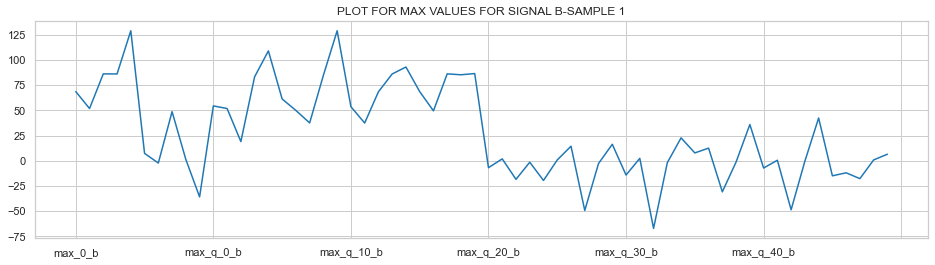

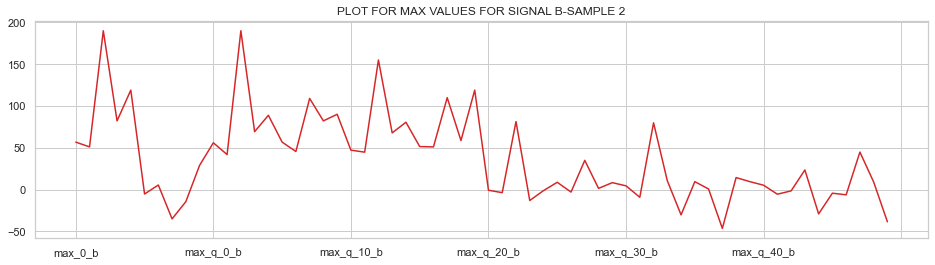

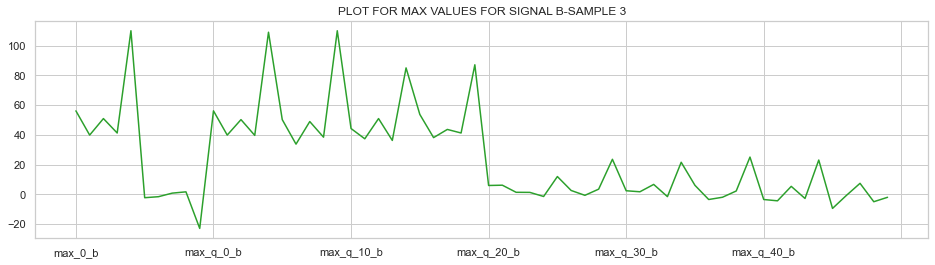

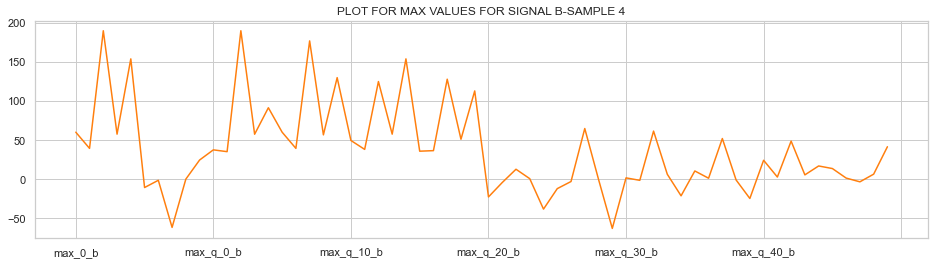

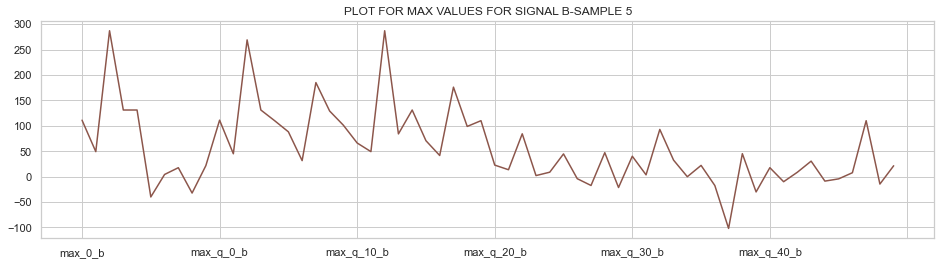

In [86]:
#Forming a seperate dataframe for only mean columns for signal B
max_b_data= df_eeg.loc[:,'max_0_b':'max_q_49_b']

max_b_data.head()

#SAMPLE 1- SIGNAL B
max_b_data.iloc[0,:].plot(figsize=(16,4),title='PLOT FOR MAX VALUES FOR SIGNAL B-SAMPLE 1',color='tab:blue')
plt.show()

#SAMPLE 2-SIGNAL B
max_b_data.iloc[200,:].plot(figsize=(16,4),title='PLOT FOR MAX VALUES FOR SIGNAL B-SAMPLE 2',color='tab:red')
plt.show()

#SAMPLE 3-SIGNAL B
max_b_data.iloc[500,:].plot(figsize=(16,4),title='PLOT FOR MAX VALUES FOR SIGNAL B-SAMPLE 3',color='tab:green')
plt.show()

#SAMPLE 4-SIGNAL B
max_b_data.iloc[1000,:].plot(figsize=(16,4),title='PLOT FOR MAX VALUES FOR SIGNAL B-SAMPLE 4',color='tab:orange')
plt.show()

#SAMPLE 5-SIGNAL B
max_b_data.iloc[1600,:].plot(figsize=(16,4),title='PLOT FOR MAX VALUES FOR SIGNAL B-SAMPLE 5',color='tab:brown')
plt.show()

### PLOT FOR FFT VALUES

#### SIGNAL A

fft_0_a  fft_1_a  fft_2_a  fft_3_a  fft_4_a  fft_5_a  fft_6_a  fft_7_a  fft_8_a  fft_9_a  fft_10_a  fft_11_a  fft_12_a  fft_13_a  fft_14_a  fft_15_a  fft_16_a  fft_17_a  fft_18_a  fft_19_a  fft_20_a  fft_21_a  fft_22_a  fft_23_a  fft_24_a  fft_25_a  fft_26_a  fft_27_a  fft_28_a  fft_29_a  fft_30_a  fft_31_a  fft_32_a  fft_33_a  fft_34_a  fft_35_a  fft_36_a  fft_37_a  fft_38_a  fft_39_a  fft_40_a  fft_41_a  fft_42_a  fft_43_a  fft_44_a  fft_45_a  fft_46_a  fft_47_a  fft_48_a  fft_49_a  fft_50_a  fft_51_a  fft_52_a  fft_53_a  fft_54_a  fft_55_a  fft_56_a  fft_57_a  fft_58_a  fft_59_a  fft_60_a  fft_61_a  fft_62_a  fft_63_a  fft_64_a  fft_65_a  fft_66_a  fft_67_a  fft_68_a  fft_69_a  fft_70_a  fft_71_a  fft_72_a  fft_73_a  fft_74_a  fft_75_a  fft_76_a  fft_77_a  fft_78_a  fft_79_a  fft_80_a  fft_81_a  fft_82_a  fft_83_a  fft_84_a  fft_85_a  fft_86_a  fft_87_a  fft_88_a  fft_89_a  fft_90_a  fft_91_a  fft_92_a  fft_93_a  fft_94_a  fft_95_a  fft_96_a  fft_97_a  fft_98_a  fft_99_a  \
0   -520.0   398.00   -201.0   -201.0   398.00    -52.2   121.00    -64.0    -64.0   121.00    -412.0    330.00   -229.00   -229.00    330.00    -508.0    331.00   -176.00   -176.00    331.00      86.8    -40.60      71.4      71.4    -40.60    -305.0    250.00    -125.0    -125.0    250.00    -448.0    415.00   -249.00   -249.00    415.00     195.0     -75.1     45.60     45.60     -75.1    -522.0    410.00   -184.00   -184.00    410.00    -406.0    379.00  -153.000  -153.000    379.00      29.8    126.00     -7.97     -7.97    126.00   -387.00     365.0   -252.00   -252.00     365.0    -202.0     338.0    -212.0    -212.0     338.0     418.0     -89.0     -1.97     -1.97     -89.0    -375.0     323.0    -210.0    -210.0     323.0    -507.0     539.0   -290.00   -290.00     539.0      40.3     181.0   -74.500   -74.500     181.0    -512.0     428.0    -226.0    -226.0     428.0    -414.0    379.00    -216.0    -216.0    379.00     141.0     60.40     -9.31     -9.31     60.40   
1     66.2    -4.30     43.6     43.6    -4.30     66.0   -29.00     73.3     73.3   -29.00     130.0      5.51     27.00     27.00      5.51     181.0     -3.69     -5.00     -5.00     -3.69     170.0      7.46     -25.2     -25.2      7.46     193.0      8.37     -19.4     -19.4      8.37     189.0     18.80     -8.48     -8.48     18.80     175.0      22.8    -36.60    -36.60      22.8     108.0    -19.60      1.63      1.63    -19.60     124.0     -3.32    -0.406    -0.406     -3.32      87.4    -26.80     20.30     20.30    -26.80    148.00     -10.8      1.51      1.51     -10.8      91.0     -10.1      31.6      31.6     -10.1     160.0      13.3    -26.80    -26.80      13.3     134.0      20.4     -10.1     -10.1      20.4     113.0      15.0     18.20     18.20      15.0     143.0      35.4   -28.400   -28.400      35.4     167.0      17.5     -40.8     -40.8      17.5     112.0     18.10     -15.7     -15.7     18.10      96.7      1.04    -10.40    -10.40      1.04   
2    -90.8   204.00    -77.1    -77.1   204.00   -488.0   415.00   -187.0   -187.0   415.00    -420.0    375.00   -153.00   -153.00    375.00    -332.0    360.00   -137.00   -137.00    360.00    -567.0    545.00    -281.0    -281.0    545.00    -433.0    458.00    -232.0    -232.0    458.00    -377.0    459.00   -210.00   -210.00    459.00    -481.0     432.0   -211.00   -211.00     432.0    -296.0    332.00   -157.00   -157.00    332.00     -87.1    175.00   -56.700   -56.700    175.00    -384.0    351.00   -175.00   -175.00    351.00   -431.00     369.0   -144.00   -144.00     369.0    -409.0     434.0    -149.0    -149.0     434.0    -698.0     566.0   -221.00   -221.00     566.0    -263.0     343.0    -175.0    -175.0     343.0     -62.5     219.0   -125.00   -125.00     219.0    -452.0     367.0  -161.000  -161.000     367.0    -358.0     361.0    -169.0    -169.0     361.0    -140.0    240.00    -106.0    -106.0    240.00    -525.0    488.00   -233.00   -233.00    488.00   
3    119.0     6.25    

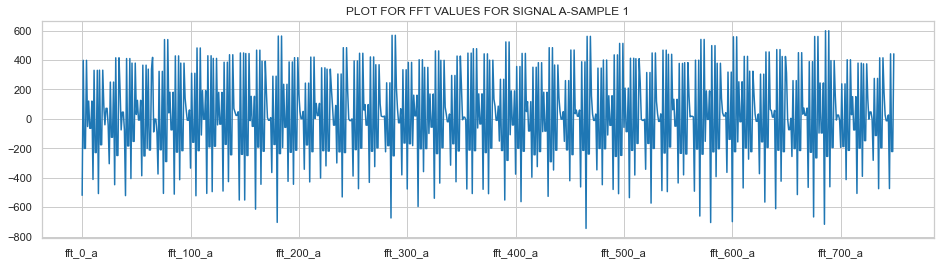

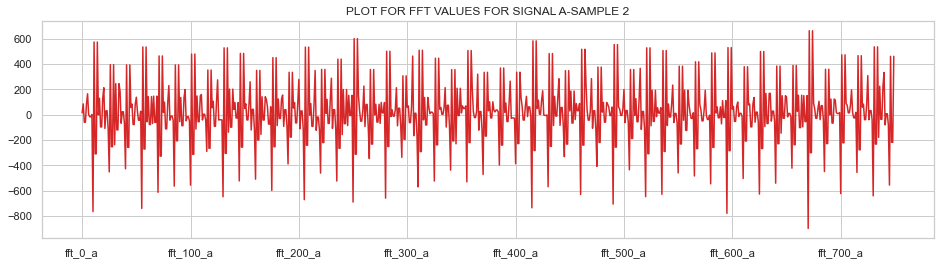

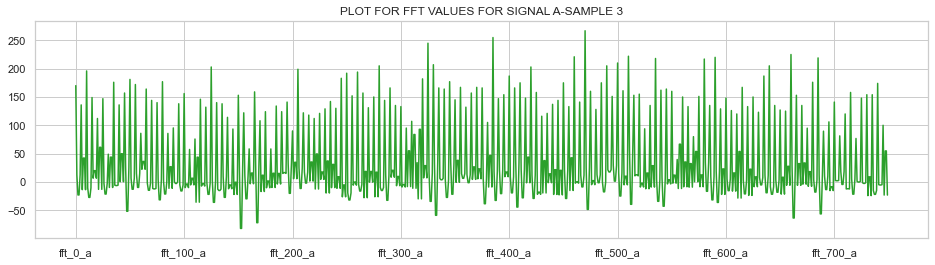

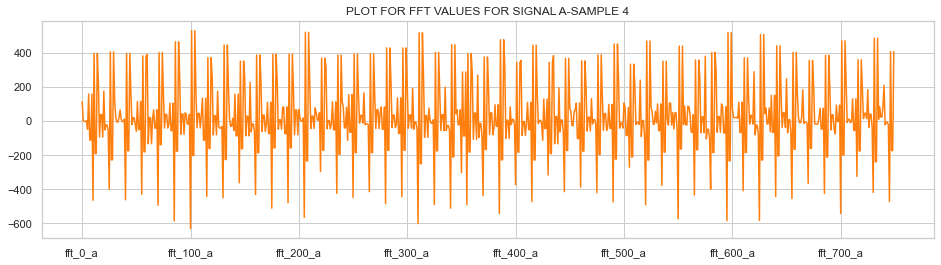

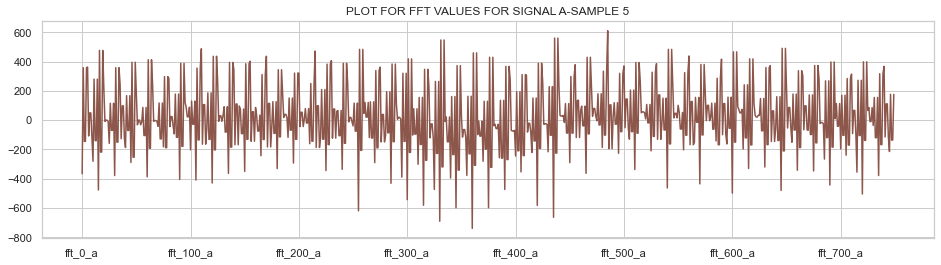

In [87]:
#Forming a seperate dataframe for only mean columns for signal A
fft_a_data= df_eeg.loc[:,'fft_0_a': 'fft_749_a']

fft_a_data.head()

#SAMPLE 1- SIGNAL A
fft_a_data.iloc[0,:].plot(figsize=(16,4),title='PLOT FOR FFT VALUES FOR SIGNAL A-SAMPLE 1',color='tab:blue')
plt.show()

#SAMPLE 2-SIGNAL A
fft_a_data.iloc[200,:].plot(figsize=(16,4),title='PLOT FOR FFT VALUES FOR SIGNAL A-SAMPLE 2',color='tab:red')
plt.show()

#SAMPLE 3-SIGNAL A
fft_a_data.iloc[500,:].plot(figsize=(16,4),title='PLOT FOR FFT VALUES FOR SIGNAL A-SAMPLE 3',color='tab:green')
plt.show()

#SAMPLE 4-SIGNAL A
fft_a_data.iloc[1000,:].plot(figsize=(16,4),title='PLOT FOR FFT VALUES FOR SIGNAL A-SAMPLE 4',color='tab:orange')
plt.show()

fft_a_data.iloc[1600,:].plot(figsize=(16,4),title='PLOT FOR FFT VALUES FOR SIGNAL A-SAMPLE 5',color='tab:brown')
plt.show()

#### SIGNAL B

fft_0_b  fft_1_b  fft_2_b  fft_3_b  fft_4_b  fft_5_b  fft_6_b  fft_7_b  fft_8_b  fft_9_b  fft_10_b  fft_11_b  fft_12_b  fft_13_b  fft_14_b  fft_15_b  fft_16_b  fft_17_b  fft_18_b  fft_19_b  fft_20_b  fft_21_b  fft_22_b  fft_23_b  fft_24_b  fft_25_b  fft_26_b  fft_27_b  fft_28_b  fft_29_b  fft_30_b  fft_31_b  fft_32_b  fft_33_b  fft_34_b  fft_35_b  fft_36_b  fft_37_b  fft_38_b  fft_39_b  fft_40_b  fft_41_b  fft_42_b  fft_43_b  fft_44_b  fft_45_b  fft_46_b  fft_47_b  fft_48_b  fft_49_b  fft_50_b  fft_51_b  fft_52_b  fft_53_b  fft_54_b  fft_55_b  fft_56_b  fft_57_b  fft_58_b  fft_59_b  fft_60_b  fft_61_b  fft_62_b  fft_63_b  fft_64_b  fft_65_b  fft_66_b  fft_67_b  fft_68_b  fft_69_b  fft_70_b  fft_71_b  fft_72_b  fft_73_b  fft_74_b  fft_75_b  fft_76_b  fft_77_b  fft_78_b  fft_79_b  fft_80_b  fft_81_b  fft_82_b  fft_83_b  fft_84_b  fft_85_b  fft_86_b  fft_87_b  fft_88_b  fft_89_b  fft_90_b  fft_91_b  fft_92_b  fft_93_b  fft_94_b  fft_95_b  fft_96_b  fft_97_b  fft_98_b  fft_99_b  \
0   -508.0   438.00  -222.00  -222.00   438.00    143.0    59.40     5.05     5.05    59.40    -159.0    290.00    -227.0    -227.0    290.00    -546.0    506.00    -273.0    -273.0    506.00    -113.0    204.00    -50.10    -50.10    204.00   -372.00  343.0000   -192.00   -192.00  343.0000 -567.0000    456.00    -226.0    -226.0    456.00      52.4   107.000     -76.4     -76.4   107.000    -400.0     361.0   -250.00   -250.00     361.0    -323.0     373.0   -217.00   -217.00     373.0     -88.8     189.0     -88.2     -88.2     189.0    -525.0    476.00   -286.00   -286.00    476.00    -349.0     373.0    -217.0    -217.0     373.0     143.0     42.50      2.34      2.34     42.50    -154.0     267.0   -215.00   -215.00     267.0    -420.0    462.00   -239.00   -239.00    462.00      34.1     65.00      14.6      14.6     65.00    -463.0     382.0   -210.00   -210.00     382.0    -746.0     566.0   -242.00   -242.00     566.0     156.0     28.00     -7.27     -7.27     28.00   
1    126.0    -4.00     7.42     7.42    -4.00     81.6   -22.30    35.30    35.30   -22.30     178.0     -8.97     -12.8     -12.8     -8.97     155.0     -9.56      31.6      31.6     -9.56     177.0      7.23     -9.78     -9.78      7.23    188.00   -0.0405     10.40     10.40   -0.0405  153.0000     -1.77      35.1      35.1     -1.77     144.0    -0.525      37.3      37.3    -0.525      65.1     -33.4     76.00     76.00     -33.4      89.2     -31.9     38.70     38.70     -31.9     168.0     -15.0     -11.5     -11.5     -15.0     138.0      1.75      7.25      7.25      1.75     174.0       3.7     -16.5     -16.5       3.7     187.0      9.95    -25.70    -25.70      9.95     134.0      15.5      2.81      2.81      15.5     104.0      4.19     27.20     27.20      4.19      89.3      9.19      32.9      32.9      9.19     176.0      10.0     -2.89     -2.89      10.0     203.0      11.4     -7.14     -7.14      11.4     166.0      5.97     11.60     11.60      5.97   
2    -85.9   361.00   -62.20   -62.20   361.00   -558.0   684.00  -152.00  -152.00   684.00    -312.0    437.00     -32.6     -32.6    437.00    -291.0    528.00     -67.6     -67.6    528.00    -526.0    646.00   -164.00   -164.00    646.00   -183.00  432.0000    -63.20    -63.20  432.0000    0.0864    289.00      29.6      29.6    289.00    -406.0   549.000     -90.0     -90.0   549.000    -269.0     489.0    -75.70    -75.70     489.0    -189.0     392.0      5.99      5.99     392.0    -398.0     547.0    -132.0    -132.0     547.0    -104.0    312.00     -5.60     -5.60    312.00      21.8     228.0      36.3      36.3     228.0    -131.0    323.00    -84.00    -84.00    323.00    -313.0     479.0    -93.40    -93.40     479.0    -186.0    425.00    -59.30    -59.30    425.00    -328.0    476.00    -130.0    -130.0    476.00    -128.0     298.0     -9.20     -9.20     298.0      76.3     219.0    -26.90    -26.90     219.0    -171.0    293.00    -75.80    -75.80    293.00   
3     69.5     3.89    

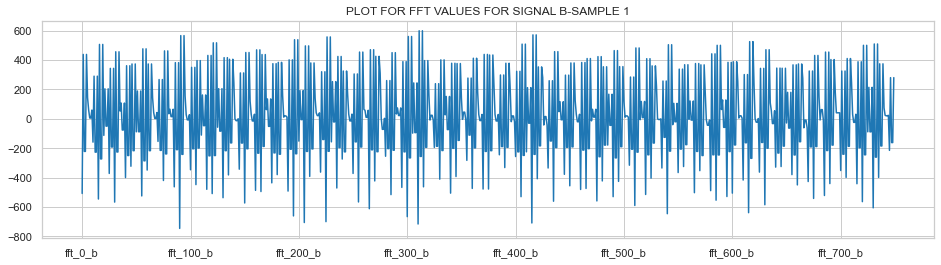

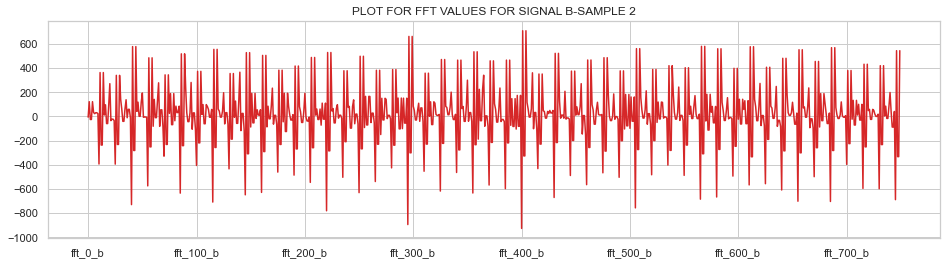

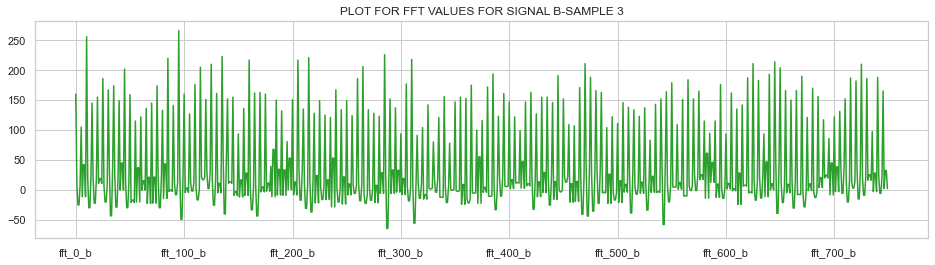

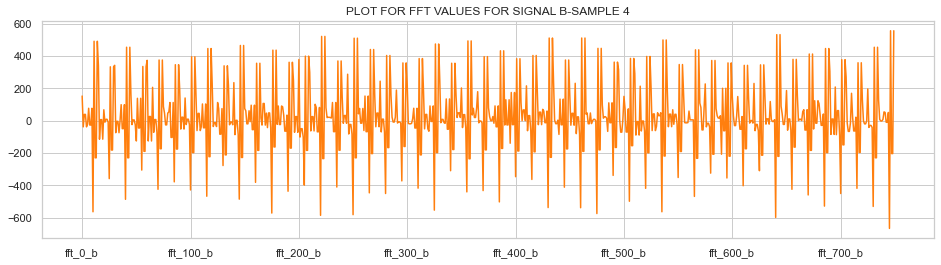

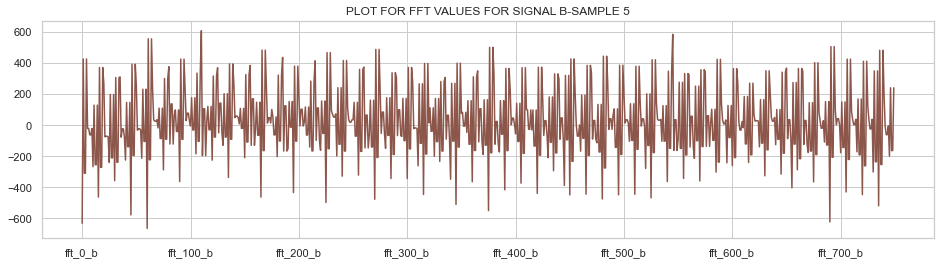

In [88]:
#Forming a seperate dataframe for only mean columns for signal B
fft_b_data= df_eeg.loc[:,'fft_0_b': 'fft_749_b']

fft_b_data.head()

#SAMPLE 1- SIGNAL B
fft_b_data.iloc[0,:].plot(figsize=(16,4),title='PLOT FOR FFT VALUES FOR SIGNAL B-SAMPLE 1',color='tab:blue')
plt.show()

#SAMPLE 2-SIGNAL B
fft_b_data.iloc[200,:].plot(figsize=(16,4),title='PLOT FOR FFT VALUES FOR SIGNAL B-SAMPLE 2',color='tab:red')
plt.show()

#SAMPLE 3-SIGNAL B
fft_b_data.iloc[500,:].plot(figsize=(16,4),title='PLOT FOR FFT VALUES FOR SIGNAL B-SAMPLE 3',color='tab:green')
plt.show()

#SAMPLE 4-SIGNAL B
fft_b_data.iloc[1000,:].plot(figsize=(16,4),title='PLOT FOR FFT VALUES FOR SIGNAL B-SAMPLE 4',color='tab:orange')
plt.show()

#SAMPLE 5-SIGNAL B
fft_b_data.iloc[1600,:].plot(figsize=(16,4),title='PLOT FOR FFT VALUES FOR SIGNAL B-SAMPLE 5',color='tab:brown')
plt.show()

### CLASS DISTRIBUTION PLOT

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Data provided for each label')

Text(0.4, 708, '33.2%')

Text(1.4, 716, '33.6%')

Text(2.4000000000000004, 708, '33.2%')

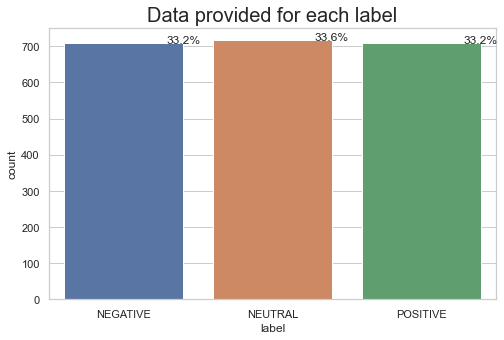

In [78]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df_eeg))
plt.title('Data provided for each label', fontsize=20)
ax= sns.countplot(x ='label', data = df_eeg)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [5]:
df_eeg['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

## Stage 2: Feature Selection Using Genetic Algorithm

In [6]:
data_eeg= df_eeg.copy()
from sklearn.preprocessing import LabelEncoder
lab= LabelEncoder()
data_eeg['label']= lab.fit_transform(data_eeg['label'])

In [7]:
data_eeg['label'].value_counts()

1    716
2    708
0    708
Name: label, dtype: int64

In [8]:
data_eeg.head(5)

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  mean_d_39_a  mean_d_40_a  mean_d_41_a  mean_d_42_a  mean_d_43_a  mean_d_44_a  mean_d_45_a  mean_d_46_a  mean_d_47_a  mean_d_48_a  mean_d_49_a  stddev_0_a  stddev_1_a  stddev_2_a  stddev_3_a  stddev_4_a  stddev_d_0_a  stddev_d_1_a  stddev_d_2_a  stddev_d_3_a  stddev_d_4_a  moments_0_a  moments_1_a  moments_2_a  moments_3_a  moments_4_a  moments_5_a  moments_6_a   moments_7_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411      -15.70        2.06        3.15         2.15         29.5       -353.0        14.40         21.5        5.98        30.7      -343.0        14.7        27.9         3.17         32.2       -368.0         15.9         36.4         7.08         28.8       -359.0         17.3         19.6      -3.8300       -1.230    -10.80000       -0.363        -6.41        -1.03       -2.780        14.60       -1.540   -14.900000        -4.94        0.664         5.82       -2.920         1.90         2.80       -1.550        25.50        -1.18        -8.51       -1.110        1.890        16.60       -2.550       8.3100        -3.91        3.440       -8.820       -1.370       16.800        28.1        7.80       203.0       39.90        36.1        -1.690        -0.876          8.12         -1.72         0.747      10000.0        57.40    4170000.0      40400.0       8750.0    1180000.0      11500.0  3.690000e+09   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680        2.88        3.83       -4.82        25.60         32.8         29.6        21.50         17.4       25.50        31.7        31.5        26.2        32.9        31.80         33.1         33.2         28.5         26.8        32.40         34.7         33.8         27.0         14.2       0.0342        1.100     -1.87000       -4.690       -15.40        -6.22       -0.328        -3.53       -6.980    -9.370000        -6.85       -1.890        -4.13       -5.460         3.20        -6.25       -1.430        -1.65        -2.28         6.07       -6.880       -3.000        -2.26       -0.762      18.6000        -0.63       -1.560       -0.605        1.520       12.600         7.1        3.55        10.3        6.51        33.1        -0.525        -0.516         -1.91         -1.67         0.315         21.8       -18.20       -344.0        -29.7     -10400.0       6690.0        473.0  3.180000e+04   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360       90.20       89.90        2.03         7.75         30.1       -441.0         9.89         25.3      -68.90        25.3      -481.0       -65.4        20.0        79.80         31.0       -408.0         91.9         29.5        18.80         31.1       -335.0         32.2         19.9      76.6000        4.850     39.90000       75.300         5.27       -72.00       -0.843       -33.00      -82.000    -4.200000       -11.00       -0.972      -106.00      -22.300         5.36      -149.00       -5.690       -72.90      -157.00        -9.48      -87.600       -5.820      -146.00      -97.600       0.0884        61.00       -0.129      -73.000       59.800        9.560        70.4        4.12       167.0       71.50        30.6       -34.200        -2.280         23.00        -36.70         0.450    -387000.0       -89.00    -937000.0    -428000.0      -5670.0  104000000.0       1470.0  1.990000e+09   
3       14.90  

In [9]:
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
X= data_eeg.drop(['label'],axis = 1)
y= data_eeg["label"]
estimator = DecisionTreeClassifier()
#estimator = RandomForestClassifier(max_depth=6, random_state=0)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=2,
    scoring="accuracy", max_features= 65,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])


Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	100   	[  0.853149  30.53       0.014127]	[  0.075945  19.105211   0.005226]	[ 0.543627  2.        0.004027]	[  0.935747  64.         0.031231]
1  	57    	[-1699.254947    55.39      1700.011029]	[ 3756.665183    40.596772  3756.323003]	[-10000.           12.            0.004479]	[     0.939025    163.        10000.      ]
2  	51    	[-1999.268041    62.52      2000.009568]	[ 4000.365979    42.388319  3999.995216]	[-10000.           12.            0.003424]	[     0.940913    231.        10000.      ]
3  	61    	[-2399.298843    69.92      2400.008823]	[ 4271.225317    43.366503  4270.826343]	[-10000.           18.            0.004533]	[     0.940913    172.        10000.      ]
4  	55    	[-1799.238781    64.33      1800.009119]	[ 3842.23119     38.296489  3841.87027 ]	[-10000.           34.   

In [13]:
len(X.columns[model.support_])

l= [[X.columns[model.support_]]]

l

[[Index(['mean_2_a', 'mean_4_a', 'mean_d_2_a2', 'mean_d_15_a', 'max_q_4_a', 'max_q_21_a', 'min_q_19_a', 'min_q_28_a', 'min_q_49_a', 'covmat_0_a', 'covmat_97_a', 'eigen_9_a', 'logm_35_a', 'logm_38_a', 'fft_19_a', 'fft_31_a', 'fft_40_a', 'fft_91_a', 'fft_122_a', 'fft_251_a', 'fft_262_a', 'fft_395_a', 'fft_403_a', 'fft_415_a', 'fft_484_a', 'fft_514_a', 'fft_557_a', 'fft_584_a', 'fft_654_a', 'fft_736_a', 'mean_d_16_b', 'mean_d_30_b', 'mean_d_37_b', 'mean_d_39_b', 'stddev_2_b', 'max_q_18_b', 'min_q_1_b', 'min_q_18_b', 'covmat_58_b', 'covmat_120_b', 'logm_24_b', 'entropy1_b', 'fft_0_b', 'fft_26_b', 'fft_29_b', 'fft_70_b', 'fft_149_b', 'fft_242_b', 'fft_517_b', 'fft_544_b', 'fft_676_b', 'fft_730_b'], dtype='object')]]

The selected columns are ['mean_2_a', 'mean_4_a', 'mean_d_2_a2', 'mean_d_15_a', 'max_q_4_a', 
                          'max_q_21_a', 'min_q_19_a', 'min_q_28_a', 'min_q_49_a', 'covmat_0_a', 
                          'covmat_97_a', 'eigen_9_a', 'logm_35_a', 'logm_38_a', 'fft_19_a', 
                          'fft_31_a', 'fft_40_a', 'fft_91_a', 'fft_122_a', 'fft_251_a',
                          'fft_262_a', 'fft_395_a', 'fft_403_a', 'fft_415_a', 'fft_484_a',
                          'fft_514_a', 'fft_557_a', 'fft_584_a', 'fft_654_a', 'fft_736_a', 
                          'mean_d_16_b', 'mean_d_30_b', 'mean_d_37_b', 'mean_d_39_b', 
                          'stddev_2_b', 'max_q_18_b', 'min_q_1_b', 'min_q_18_b', 'covmat_58_b',
                          'covmat_120_b', 'logm_24_b', 'entropy1_b', 'fft_0_b', 'fft_26_b', 
                          'fft_29_b', 'fft_70_b', 'fft_149_b', 'fft_242_b', 'fft_517_b', 
                          'fft_544_b', 'fft_676_b', 'fft_730_b']

In [9]:
# Creating new dataset with selected features
df_new= data_eeg[['mean_2_a', 'mean_4_a', 'mean_d_2_a2', 'mean_d_15_a', 'max_q_4_a', 
                   'max_q_21_a', 'min_q_19_a', 'min_q_28_a', 'min_q_49_a', 'covmat_0_a', 
                   'covmat_97_a', 'eigen_9_a', 'logm_35_a', 'logm_38_a', 'fft_19_a', 'fft_31_a',
                   'fft_40_a', 'fft_91_a', 'fft_122_a', 'fft_251_a', 'fft_262_a', 'fft_395_a', 
                   'fft_403_a', 'fft_415_a', 'fft_484_a', 'fft_514_a', 'fft_557_a', 'fft_584_a', 
                   'fft_654_a', 'fft_736_a', 'mean_d_16_b', 'mean_d_30_b', 'mean_d_37_b', 
                   'mean_d_39_b', 'stddev_2_b', 'max_q_18_b', 'min_q_1_b', 'min_q_18_b', 
                   'covmat_58_b', 'covmat_120_b', 'logm_24_b', 'entropy1_b', 'fft_0_b', 
                   'fft_26_b', 'fft_29_b', 'fft_70_b', 'fft_149_b', 'fft_242_b', 'fft_517_b', 
                   'fft_544_b', 'fft_676_b', 'fft_730_b','label']]
df_new.head()
df_new.shape

mean_2_a  mean_4_a  mean_d_2_a2  mean_d_15_a  max_q_4_a  max_q_21_a  min_q_19_a  min_q_28_a  min_q_49_a  covmat_0_a  covmat_97_a  eigen_9_a  logm_35_a  logm_38_a  fft_19_a  fft_31_a  fft_40_a  fft_91_a  fft_122_a  fft_251_a  fft_262_a  fft_395_a  fft_403_a  fft_415_a  fft_484_a  fft_514_a  fft_557_a  fft_584_a  fft_654_a  fft_736_a  mean_d_16_b  mean_d_30_b  mean_d_37_b  mean_d_39_b  stddev_2_b  max_q_18_b  min_q_1_b  min_q_18_b  covmat_58_b  covmat_120_b  logm_24_b  entropy1_b  fft_0_b  fft_26_b  fft_29_b  fft_70_b  fft_149_b  fft_242_b  fft_517_b  fft_544_b  fft_676_b  fft_730_b  label
0    -356.0      26.3       -353.0         7.08      137.0       5.340       -43.6       -9.98        4.08     20400.0      34200.0      29.90    -0.0378     0.2210    331.00    415.00    -522.0    379.00    -186.00      394.0      -42.8     -108.0    -200.00     -397.0     400.00      409.0    -239.00      498.0       3.65     415.00         30.8       -0.567       -15.20        0.459      210.00        85.3       16.8      -30.30         89.1       -637.00      0.126        4.98   -508.0  343.0000  343.0000    -154.0     312.00    -225.00       7.83     504.00     431.00     -606.0      0
1      32.0      22.8         29.6        32.40       63.5      -1.550       -52.5       -5.61      -17.70        25.7        -93.7       3.34     0.0255    -0.2100     -3.69     18.80     108.0     18.10       6.74       13.7       11.1      170.0       5.22       60.0       1.61      -12.3     -19.60      -13.0      11.80       7.87         30.2        9.820        -1.82      -12.700        9.15        34.2       26.4       14.80         32.8         -3.59     -0.564        5.00    126.0   -0.0405   -0.0405     134.0       4.45     -12.50      -2.99      -1.98      -6.57      225.0      1
2    -416.0      23.7       -441.0        18.80       78.2       3.200       -36.8      -50.30       13.40     35200.0      41400.0     132.00     2.9000     0.0495    360.00    459.00    -296.0    240.00    -135.00      228.0     -381.0     -513.0     -68.60     -263.0     170.00       92.8    -115.00      234.0     203.00     348.00         30.5       78.400       -44.20       -6.070      168.00        23.4       25.1       -4.90       -429.0      -4680.00     -0.275        5.01    -85.9  432.0000  432.0000    -313.0     349.00     -26.60    -152.00     314.00     223.00     -251.0      2
3    -143.0      24.3       -148.0        13.60       95.5      -0.558       -53.7       -8.29       16.80      4430.0      16200.0      30.40     0.1640     0.1040    -47.50    116.00     239.0      4.74      -7.94      -88.1     -124.0     -368.0       8.51       95.4     221.00     -114.0     -35.00      -42.6     394.00      40.30         30.8       -0.589       -14.70        3.870      253.00        36.5       25.0        4.05       1430.0      -2100.00      0.501        5.00     69.5   65.3000   65.3000     -34.7     -13.50      53.00    -160.00      69.80     -20.30      322.0      2
4      45.2      24.5         43.7        32.30       92.6      -7.580       -42.3      -29.20       15.80       373.0        -87.5     124.00     2.3400    -2.5100     -5.94     -9.26     221.0    -13.70      18.90      -32.4     -102.0      319.0     139.00      309.0      -1.88      -26.0       8.93      -38.7      -7.78       8.17         31.3       27.200      -133.00        5.170       75.50        43.4       18.7        8.83       -572.0        164.00     -0.722        4.96    226.0  -53.9000  -53.9000     235.0     -24.60      -5.06     108.00    -136.00      19.60      252.0      1

(2132, 53)

In [10]:
df_new['label'].value_counts()


1    716
2    708
0    708
Name: label, dtype: int64

## Stage 3: Classification of ML models
- Split the new dataset with reduced features in to training and testing data(70%-30% split)
- Run Machine learning algorithms:
   - Random forest
   - K-nearest Neigbours
   - SVM
   - ANN

In [11]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X= df_new.drop(['label'],axis = 1)
y= df_new["label"]
X_train_1,X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.30, random_state=1)

In [12]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    classes= ['Negative','Neutral','Positive']
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
    

In [13]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
               
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                
                dict_metric[keys]["TNR"] = tn / (fp + tn)
            
    return dict_metric

### KNN for feature-reduced dataset

KNeighborsClassifier(n_jobs=16)

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       218
           1       0.93      0.99      0.96       210
           2       0.94      0.77      0.85       212

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640

Confusion matrix, without normalization
[[209   0   9]
 [  0 208   2]
 [ 32  16 164]]


1         2         3
TPR  0.958716  0.990476  0.773585
FNR  0.041284  0.009524  0.226415
FPR  0.075829  0.037209  0.025701
TNR  0.924171  0.962791  0.974299

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0   KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0   KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299

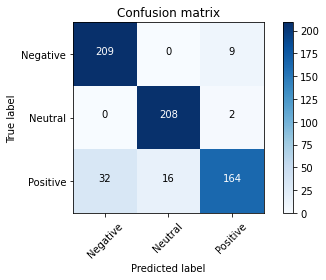

In [14]:
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn.fit(X_train_1,y_train_1)

y_pred_knn= knn.predict(X_test_1)

F1_Score=f1_score(y_test_1,y_pred_knn,average='weighted')
Precision=precision_score(y_test_1,y_pred_knn,average='weighted')
Recall=recall_score(y_test_1,y_pred_knn,average='weighted')
Accuracy= accuracy_score(y_test_1,y_pred_knn)

print("Classification Report: ")
print(classification_report(y_test_1,y_pred_knn))

cnf_matrix = confusion_matrix(y_test_1,y_pred_knn)

plot_confusion_matrix(cnf_matrix)


df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]
results = pd.DataFrame([['KNN','GAFeature-reduced' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

results_2= pd.DataFrame([['KNN','GAFeature-reduced',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2'])
results_2


### Random Forest for feature reduced dataset

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       218
           1       1.00      1.00      1.00       210
           2       0.99      0.96      0.97       212

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640

Confusion matrix, without normalization
[[216   0   2]
 [  0 209   1]
 [  7   1 204]]


1         2         3
TPR  0.990826  0.995238  0.962264
FNR  0.009174  0.004762  0.037736
FPR  0.016588  0.002326  0.007009
TNR  0.983412  0.997674  0.992991

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0            KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1  Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0            KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1  Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991

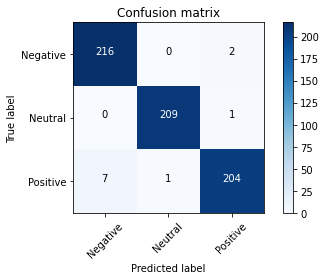

In [15]:
rf= RandomForestClassifier(n_estimators=400,random_state=10).fit(X_train_1,y_train_1)
y_pred=rf.predict(X_test_1)

cnf_matrix = confusion_matrix(y_test_1,y_pred)

print("Classification Report: ")
print(classification_report(y_test_1,y_pred))

F1_Score=f1_score(y_test_1,y_pred,average='weighted')
Precision=precision_score(y_test_1,y_pred,average='weighted')
Recall=recall_score(y_test_1,y_pred,average='weighted')
Accuracy= accuracy_score(y_test_1,y_pred)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]

results = results.append(pd.DataFrame([['Random Forest','GAFeature-reduced' ,Accuracy, Precision, Recall, F1_Score ]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results
                                       
results_2= results_2.append(pd.DataFrame([['Random Forest','GAFeature-reduced',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

### SVM for feature reduced dataset

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       218
           1       0.97      0.97      0.97       210
           2       0.88      0.86      0.87       212

    accuracy                           0.91       640
   macro avg       0.91      0.91      0.91       640
weighted avg       0.91      0.91      0.91       640

Confusion matrix, without normalization
[[199   0  19]
 [  0 203   7]
 [ 22   7 183]]


1         2         3
TPR  0.912844  0.966667  0.863208
FNR  0.087156  0.033333  0.136792
FPR  0.052133  0.016279  0.060748
TNR  0.947867  0.983721  0.939252

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0             KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1   Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2  Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0             KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1   Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2  Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252

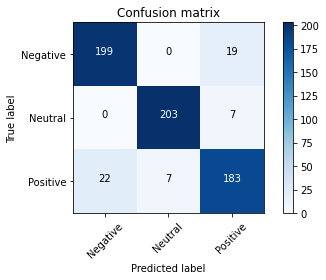

In [16]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0).fit(X_train_1,y_train_1) 
y_pred=svc.predict(X_test_1)

cnf_matrix = confusion_matrix(y_test_1,y_pred)

print("Classification Report: ")
print(classification_report(y_test_1,y_pred))

F1_Score=f1_score(y_test_1,y_pred,average='weighted')
Precision=precision_score(y_test_1,y_pred,average='weighted')
Recall=recall_score(y_test_1,y_pred,average='weighted')
Accuracy= accuracy_score(y_test_1,y_pred)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]


results = results.append(pd.DataFrame([['Multiclass SVM','GAFeature-reduced' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['Multiclass SVM','GAFeature-reduced',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

### ANN for feature reduced dataset

In [17]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

In [18]:
from tensorflow.keras.utils import to_categorical
input_dim = X_train_1.shape[1]
nb_classes= 3

Y_test= to_categorical(y_test_1)

#ANN Model 1 (Using rmsprop Optimizer)

model = Sequential()
model.add(Dense(15, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics= ['accuracy'])

print("Training...")
model.fit(X_train_1,to_categorical(y_train_1), epochs=5, batch_size=16, validation_split=0.1)

print("Generating test predictions...")
preds = np.argmax(model.predict(X_test_1,verbose=1), axis=1)


Training...
Epoch 1/5
84/84 [==============================] - 2s 15ms/step - loss: 552.6133 - accuracy: 0.3572 - val_loss: 93.5918 - val_accuracy: 0.2267
Epoch 2/5
84/84 [==============================] - 0s 5ms/step - loss: 40.4958 - accuracy: 0.3441 - val_loss: 20.4381 - val_accuracy: 0.2667
Epoch 3/5
84/84 [==============================] - 0s 3ms/step - loss: 35.8768 - accuracy: 0.3406 - val_loss: 6.9049 - val_accuracy: 0.2867
Epoch 4/5
84/84 [==============================] - 1s 11ms/step - loss: 9.5376 - accuracy: 0.3262 - val_loss: 4.1052 - val_accuracy: 0.2867
Epoch 5/5
84/84 [==============================] - 0s 4ms/step - loss: 3.6717 - accuracy: 0.3575 - val_loss: 3.2377 - val_accuracy: 0.2867


Generating test predictions...
20/20 [==============================] - 0s 2ms/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.15      0.01      0.02       218
           1       0.33      1.00      0.50       210
           2       0.00      0.00      0.00       212

    accuracy                           0.33       640
   macro avg       0.16      0.33      0.17       640
weighted avg       0.16      0.33      0.17       640

Confusion matrix, without normalization
[[  2 216   0]
 [  1 209   0]
 [ 10 202   0]]


1         2    3
TPR  0.009174  0.995238  0.0
FNR  0.990826  0.004762  1.0
FPR  0.026066  0.972093  0.0
TNR  0.973934  0.027907  1.0

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0             KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1   Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2  Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3     ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0             KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1   Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2  Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3     ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000

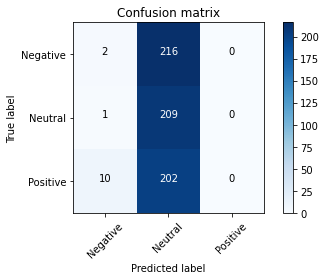

In [19]:
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1),preds)

print("Classification Report: ")
print(classification_report(Y_test.argmax(axis=1),preds))

F1_Score=f1_score(Y_test.argmax(axis=1),preds,average='weighted')
Precision=precision_score(Y_test.argmax(axis=1),preds,average='weighted')
Recall=recall_score(Y_test.argmax(axis=1),preds,average='weighted')
Accuracy= accuracy_score(Y_test.argmax(axis=1),preds)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]



results = results.append(pd.DataFrame([['ANN_rmsprop','GAFeature-reduced' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['ANN_rmsprop','GAFeature-reduced',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

In [20]:
#ANN Model 2 (Using Adam Optimizer)
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Dense(15, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics= ['accuracy'])

print("Training...")
model.fit(X_train_1,to_categorical(y_train_1), epochs=5, batch_size=16, validation_split=0.1)

print("Generating test predictions...")
preds = np.argmax(model.predict(X_test_1,verbose=1), axis=1)

Training...
Epoch 1/5
84/84 [==============================] - 1s 8ms/step - loss: 86.6769 - accuracy: 0.5315 - val_loss: 13.1010 - val_accuracy: 0.5800
Epoch 2/5
84/84 [==============================] - 0s 3ms/step - loss: 34.4987 - accuracy: 0.6232 - val_loss: 8.8524 - val_accuracy: 0.6867
Epoch 3/5
84/84 [==============================] - 0s 3ms/step - loss: 20.7787 - accuracy: 0.7355 - val_loss: 7.6414 - val_accuracy: 0.7200
Epoch 4/5
84/84 [==============================] - 0s 3ms/step - loss: 43.2720 - accuracy: 0.7744 - val_loss: 6.9588 - val_accuracy: 0.7333
Epoch 5/5
84/84 [==============================] - 0s 2ms/step - loss: 13.2472 - accuracy: 0.7740 - val_loss: 7.2901 - val_accuracy: 0.8200


Generating test predictions...
20/20 [==============================] - 0s 2ms/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       218
           1       0.88      0.94      0.91       210
           2       0.77      0.64      0.70       212

    accuracy                           0.82       640
   macro avg       0.81      0.82      0.81       640
weighted avg       0.81      0.82      0.81       640

Confusion matrix, without normalization
[[189   0  29]
 [  2 197  11]
 [ 49  27 136]]


1         2         3
TPR  0.866972  0.938095  0.641509
FNR  0.133028  0.061905  0.358491
FPR  0.120853  0.062791  0.093458
TNR  0.879147  0.937209  0.906542

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0             KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1   Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2  Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3     ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4        ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0             KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1   Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2  Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3     ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4        ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542

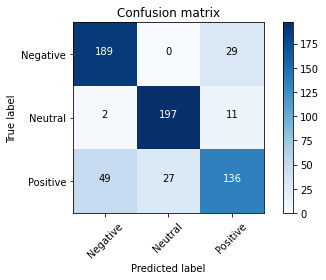

In [21]:
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1),preds)

print("Classification Report: ")
print(classification_report(Y_test.argmax(axis=1),preds))

F1_Score=f1_score(Y_test.argmax(axis=1),preds,average='weighted')
Precision=precision_score(Y_test.argmax(axis=1),preds,average='weighted')
Recall=recall_score(Y_test.argmax(axis=1),preds,average='weighted')
Accuracy= accuracy_score(Y_test.argmax(axis=1),preds)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]



results = results.append(pd.DataFrame([['ANN_adam','GAFeature-reduced' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['ANN_adam','GAFeature-reduced',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

In [22]:
#ANN Model 3 (Using l1 regularizer)
from keras import regularizers
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Dense(15, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(6,kernel_regularizer=regularizers.l1(0.0001)))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics= ['accuracy'])

print("Training...")
model.fit(X_train_1,to_categorical(y_train_1), epochs=5, batch_size=16, validation_split=0.1)

print("Generating test predictions...")
preds = np.argmax(model.predict(X_test_1,verbose=1), axis=1)

Training...
Epoch 1/5
84/84 [==============================] - 1s 7ms/step - loss: 172.6781 - accuracy: 0.4332 - val_loss: 26.7838 - val_accuracy: 0.6533
Epoch 2/5
84/84 [==============================] - 0s 3ms/step - loss: 82.1912 - accuracy: 0.6896 - val_loss: 14.5498 - val_accuracy: 0.7400
Epoch 3/5
84/84 [==============================] - 0s 3ms/step - loss: 33.3447 - accuracy: 0.7248 - val_loss: 13.0504 - val_accuracy: 0.8000
Epoch 4/5
84/84 [==============================] - 0s 3ms/step - loss: 26.9590 - accuracy: 0.7307 - val_loss: 6.4043 - val_accuracy: 0.7733
Epoch 5/5
84/84 [==============================] - 0s 3ms/step - loss: 57.6356 - accuracy: 0.7353 - val_loss: 11.3836 - val_accuracy: 0.8000


Generating test predictions...
20/20 [==============================] - 0s 1ms/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       218
           1       0.87      0.94      0.90       210
           2       0.86      0.59      0.70       212

    accuracy                           0.83       640
   macro avg       0.84      0.83      0.82       640
weighted avg       0.84      0.83      0.82       640

Confusion matrix, without normalization
[[210   0   8]
 [  0 197  13]
 [ 58  29 125]]


1         2         3
TPR  0.963303  0.938095  0.589623
FNR  0.036697  0.061905  0.410377
FPR  0.137441  0.067442  0.049065
TNR  0.862559  0.932558  0.950935

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0                 KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1       Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2      Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3         ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4            ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5  ANN_l1_regularizer  GAFeature-reduced  0.831250   0.836533  0.831250  0.822204

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                 KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1       Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2      Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3         ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4            ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5  ANN_l1_regularizer  GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935

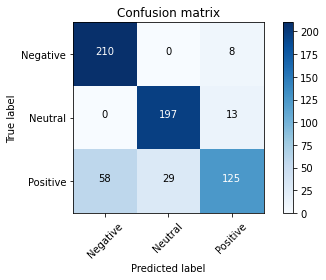

In [23]:
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1),preds)

print("Classification Report: ")
print(classification_report(Y_test.argmax(axis=1),preds))

F1_Score=f1_score(Y_test.argmax(axis=1),preds,average='weighted')
Precision=precision_score(Y_test.argmax(axis=1),preds,average='weighted')
Recall=recall_score(Y_test.argmax(axis=1),preds,average='weighted')
Accuracy= accuracy_score(Y_test.argmax(axis=1),preds)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]



results = results.append(pd.DataFrame([['ANN_l1_regularizer','GAFeature-reduced' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['ANN_l1_regularizer','GAFeature-reduced',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

In [24]:
#ANN Model 4 (Using l2 regularizer)
from keras import regularizers
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Dense(15, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(6,kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics= ['accuracy'])

print("Training...")
model.fit(X_train_1,to_categorical(y_train_1), epochs=5, batch_size=16, validation_split=0.1)

print("Generating test predictions...")
preds = np.argmax(model.predict(X_test_1,verbose=1), axis=1)

Training...
Epoch 1/5
84/84 [==============================] - 2s 13ms/step - loss: 2109.4909 - accuracy: 0.4455 - val_loss: 75.6599 - val_accuracy: 0.4800
Epoch 2/5
84/84 [==============================] - 0s 3ms/step - loss: 77.3852 - accuracy: 0.6406 - val_loss: 31.3280 - val_accuracy: 0.6867
Epoch 3/5
84/84 [==============================] - 0s 3ms/step - loss: 56.6153 - accuracy: 0.7344 - val_loss: 41.0913 - val_accuracy: 0.7867
Epoch 4/5
84/84 [==============================] - 0s 3ms/step - loss: 33.4348 - accuracy: 0.7659 - val_loss: 25.9124 - val_accuracy: 0.7267
Epoch 5/5
84/84 [==============================] - 0s 2ms/step - loss: 23.7157 - accuracy: 0.7924 - val_loss: 11.3782 - val_accuracy: 0.8267


Generating test predictions...
20/20 [==============================] - 0s 803us/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       218
           1       0.88      0.98      0.93       210
           2       0.86      0.66      0.75       212

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640

Confusion matrix, without normalization
[[199   0  19]
 [  1 206   3]
 [ 43  29 140]]


1         2         3
TPR  0.912844  0.980952  0.660377
FNR  0.087156  0.019048  0.339623
FPR  0.104265  0.067442  0.051402
TNR  0.895735  0.932558  0.948598

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0                 KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1       Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2      Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3         ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4            ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5  ANN_l1_regularizer  GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6  ANN_l2_regularizer  GAFeature-reduced  0.851562   0.852846  0.851562  0.845862

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                 KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1       Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2      Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3         ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4            ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5  ANN_l1_regularizer  GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6  ANN_l2_regularizer  GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598

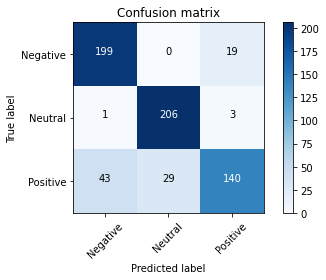

In [25]:
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1),preds)

print("Classification Report: ")
print(classification_report(Y_test.argmax(axis=1),preds))

F1_Score=f1_score(Y_test.argmax(axis=1),preds,average='weighted')
Precision=precision_score(Y_test.argmax(axis=1),preds,average='weighted')
Recall=recall_score(Y_test.argmax(axis=1),preds,average='weighted')
Accuracy= accuracy_score(Y_test.argmax(axis=1),preds)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]


results = results.append(pd.DataFrame([['ANN_l2_regularizer','GAFeature-reduced' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['ANN_l2_regularizer','GAFeature-reduced',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

### KNN for original dataset

In [26]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X= data_eeg.drop(['label'],axis = 1)
y= data_eeg["label"]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

KNeighborsClassifier(n_jobs=16)

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       218
           1       0.70      0.84      0.76       210
           2       0.63      0.42      0.51       212

    accuracy                           0.73       640
   macro avg       0.71      0.72      0.71       640
weighted avg       0.71      0.72      0.71       640

Confusion matrix, without normalization
[[198   1  19]
 [  1 176  33]
 [ 48  74  90]]


1         2         3
TPR  0.908257  0.838095  0.424528
FNR  0.091743  0.161905  0.575472
FPR  0.116114  0.174419  0.121495
TNR  0.883886  0.825581  0.878505

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0                 KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1       Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2      Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3         ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4            ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5  ANN_l1_regularizer  GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6  ANN_l2_regularizer  GAFeature-reduced  0.851562   0.852846  0.851562  0.845862
0                 KNN           Original  0.725000   0.713078  0.725000  0.709055

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                 KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1       Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2      Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3         ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4            ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5  ANN_l1_regularizer  GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6  ANN_l2_regularizer  GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598
7                 KNN           Original  0.908257  0.838095  0.424528  0.091743  0.161905  0.575472  0.116114  0.174419  0.121495  0.883886  0.825581  0.878505

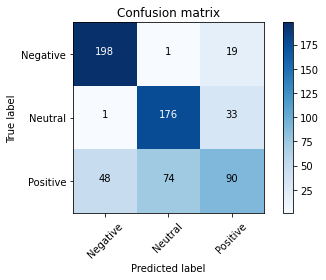

In [27]:
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn.fit(X_train,y_train)

y_pred_knn= knn.predict(X_test)

F1_Score=f1_score(y_test,y_pred_knn,average='weighted')
Precision=precision_score(y_test,y_pred_knn,average='weighted')
Recall=recall_score(y_test,y_pred_knn,average='weighted')
Accuracy= accuracy_score(y_test,y_pred_knn)

print("Classification Report: ")
print(classification_report(y_test,y_pred_knn))

cnf_matrix = confusion_matrix(y_test,y_pred_knn)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]


results = results.append(pd.DataFrame([['KNN','Original' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']))

results

results_2= results_2.append(pd.DataFrame([['KNN','Original',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

### Random forest for original dataset

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       218
           1       1.00      1.00      1.00       210
           2       0.99      0.98      0.98       212

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640

Confusion matrix, without normalization
[[216   0   2]
 [  0 209   1]
 [  5   0 207]]


1         2         3
TPR  0.990826  0.995238  0.976415
FNR  0.009174  0.004762  0.023585
FPR  0.011848  0.000000  0.007009
TNR  0.988152  1.000000  0.992991

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0                 KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1       Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2      Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3         ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4            ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5  ANN_l1_regularizer  GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6  ANN_l2_regularizer  GAFeature-reduced  0.851562   0.852846  0.851562  0.845862
7                 KNN           Original  0.725000   0.713078  0.725000  0.709055
8       Random Forest           Original  0.987500   0.987561  0.987500  0.987506

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                 KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1       Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2      Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3         ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4            ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5  ANN_l1_regularizer  GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6  ANN_l2_regularizer  GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598
7                 KNN           Original  0.908257  0.838095  0.424528  0.091743  0.161905  0.575472  0.116114  0.174419  0.121495  0.883886  0.825581  0.878505
8       Random Forest           Original  0.990826  0.995238  0.976415  0.009174  0.004762  0.023585  0.011848  0.000000  0.007009  0.988152  1.000000  0.992991

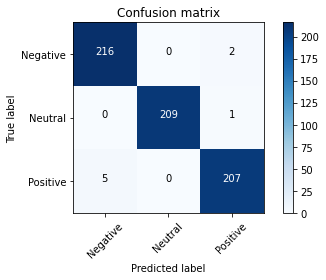

In [28]:
rf= RandomForestClassifier(n_estimators=400,random_state=10).fit(X_train,y_train)
y_pred=rf.predict(X_test)

cnf_matrix = confusion_matrix(y_test,y_pred)

print("Classification Report: ")
print(classification_report(y_test,y_pred))

F1_Score=f1_score(y_test,y_pred,average='weighted')
Precision=precision_score(y_test,y_pred,average='weighted')
Recall=recall_score(y_test,y_pred,average='weighted')
Accuracy= accuracy_score(y_test,y_pred)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]


results = results.append(pd.DataFrame([['Random Forest','Original' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['Random Forest','Original',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

### ANN for original dataset

In [29]:
input_dim = X_train.shape[1]
nb_classes= 3

Y_test= to_categorical(y_test)

#ANN Model 1 (Using rmsprop Optimizer)
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Dense(256, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics= ['accuracy'])

print("Training...")
model.fit(X_train,to_categorical(y_train), epochs=5, batch_size=50, validation_split=0.1)

print("Generating test predictions...")
preds = np.argmax(model.predict(X_test,verbose=1), axis=1)

Training...
Epoch 1/5
27/27 [==============================] - 7s 233ms/step - loss: 117895728576219.4219 - accuracy: 0.5312 - val_loss: 16728940609536.0000 - val_accuracy: 0.4467
Epoch 2/5
27/27 [==============================] - 0s 15ms/step - loss: 84547542946377.1406 - accuracy: 0.5813 - val_loss: 7861103493120.0000 - val_accuracy: 0.6600
Epoch 3/5
27/27 [==============================] - 0s 13ms/step - loss: 50204533213476.5703 - accuracy: 0.5626 - val_loss: 22466502066176.0000 - val_accuracy: 0.6267
Epoch 4/5
27/27 [==============================] - 0s 14ms/step - loss: 37603233871579.4297 - accuracy: 0.6704 - val_loss: 19071233949696.0000 - val_accuracy: 0.4667
Epoch 5/5
27/27 [==============================] - 0s 17ms/step - loss: 19195871746925.7148 - accuracy: 0.5340 - val_loss: 1356747243520.0000 - val_accuracy: 0.6533


Generating test predictions...
20/20 [==============================] - 0s 3ms/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       218
           1       0.62      0.37      0.46       210
           2       0.44      0.50      0.47       212

    accuracy                           0.62       640
   macro avg       0.61      0.62      0.60       640
weighted avg       0.62      0.62      0.60       640

Confusion matrix, without normalization
[[214   1   3]
 [  2  77 131]
 [ 58  47 107]]


1         2         3
TPR  0.981651  0.366667  0.504717
FNR  0.018349  0.633333  0.495283
FPR  0.142180  0.111628  0.313084
TNR  0.857820  0.888372  0.686916

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0                 KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1       Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2      Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3         ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4            ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5  ANN_l1_regularizer  GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6  ANN_l2_regularizer  GAFeature-reduced  0.851562   0.852846  0.851562  0.845862
7                 KNN           Original  0.725000   0.713078  0.725000  0.709055
8       Random Forest           Original  0.987500   0.987561  0.987500  0.987506
9         ANN_rmsprop           Original  0.621875   0.615230  0.621875  0.603640

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                 KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1       Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2      Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3         ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4            ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5  ANN_l1_regularizer  GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6  ANN_l2_regularizer  GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598
7                 KNN           Original  0.908257  0.838095  0.424528  0.091743  0.161905  0.575472  0.116114  0.174419  0.121495  0.883886  0.825581  0.878505
8       Random Forest           Original  0.990826  0.995238  0.976415  0.009174  0.004762  0.023585  0.011848  0.000000  0.007009  0.988152  1.000000  0.992991
9         ANN_rmsprop           Original  0.981651  0.366667  0.504717  0.018349  0.633333  0.495283  0.142180  0.111628  0.313084  0.857820  0.888372  0.686916

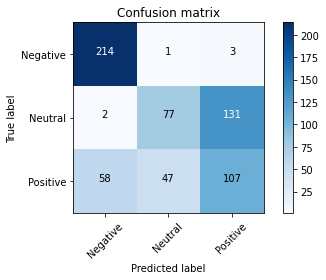

In [30]:
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1),preds)

print("Classification Report: ")
print(classification_report(Y_test.argmax(axis=1),preds))

F1_Score=f1_score(Y_test.argmax(axis=1),preds,average='weighted')
Precision=precision_score(Y_test.argmax(axis=1),preds,average='weighted')
Recall=recall_score(Y_test.argmax(axis=1),preds,average='weighted')
Accuracy= accuracy_score(Y_test.argmax(axis=1),preds)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]


results = results.append(pd.DataFrame([['ANN_rmsprop','Original' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['ANN_rmsprop','Original',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

In [31]:
#ANN Model 2 (Using Adam Optimizer)
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Dense(256, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics= ['accuracy'])

print("Training...")
model.fit(X_train,to_categorical(y_train), epochs=5, batch_size=16, validation_split=0.1)

print("Generating test predictions...")
preds = np.argmax(model.predict(X_test,verbose=1), axis=1)

Training...
Epoch 1/5
84/84 [==============================] - 7s 76ms/step - loss: 245166097804203.6562 - accuracy: 0.5437 - val_loss: 20491811160064.0000 - val_accuracy: 0.3667
Epoch 2/5
84/84 [==============================] - 1s 8ms/step - loss: 103322395813671.1562 - accuracy: 0.5139 - val_loss: 77546104291328.0000 - val_accuracy: 0.6000
Epoch 3/5
84/84 [==============================] - 1s 7ms/step - loss: 329352928842836.3125 - accuracy: 0.6020 - val_loss: 19932450390016.0000 - val_accuracy: 0.6600
Epoch 4/5
84/84 [==============================] - 0s 6ms/step - loss: 265621107595095.3438 - accuracy: 0.5800 - val_loss: 10330406125568.0000 - val_accuracy: 0.6133
Epoch 5/5
84/84 [==============================] - 1s 6ms/step - loss: 179972572199996.2500 - accuracy: 0.5190 - val_loss: 7937461846016.0000 - val_accuracy: 0.6067


Generating test predictions...
20/20 [==============================] - 0s 5ms/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       218
           1       0.43      0.06      0.11       210
           2       0.39      0.60      0.48       212

    accuracy                           0.55       640
   macro avg       0.52      0.54      0.47       640
weighted avg       0.52      0.55      0.48       640

Confusion matrix, without normalization
[[208   5   5]
 [  4  13 193]
 [ 72  12 128]]


1         2         3
TPR  0.954128  0.061905  0.603774
FNR  0.045872  0.938095  0.396226
FPR  0.180095  0.039535  0.462617
TNR  0.819905  0.960465  0.537383

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0                  KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1        Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2       Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3          ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4             ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5   ANN_l1_regularizer  GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6   ANN_l2_regularizer  GAFeature-reduced  0.851562   0.852846  0.851562  0.845862
7                  KNN           Original  0.725000   0.713078  0.725000  0.709055
8        Random Forest           Original  0.987500   0.987561  0.987500  0.987506
9          ANN_rmsprop           Original  0.621875   0.615230  0.621875  0.603640
10            ANN_adam           Original  0.545312   0.521721  0.545312  0.475439

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                  KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1        Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2       Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3          ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4             ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5   ANN_l1_regularizer  GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6   ANN_l2_regularizer  GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598
7                  KNN           Original  0.908257  0.838095  0.424528  0.091743  0.161905  0.575472  0.116114  0.174419  0.121495  0.883886  0.825581  0.878505
8        Random Forest           Original  0.990826  0.995238  0.976415  0.009174  0.004762  0.023585  0.011848  0.000000  0.007009  0.988152  1.000000  0.992991
9          ANN_rmsprop           Original  0.981651  0.366667  0.504717  0.018349  0.633333  0.495283  0.142180  0.111628  0.313084  0.857820  0.888372  0.686916
10            ANN_adam           Original  0.954128  0.061905  0.603774  0.045872  0.938095  0.396226  0.180095  0.039535  0.462617  0.819905  0.960465  0.537383

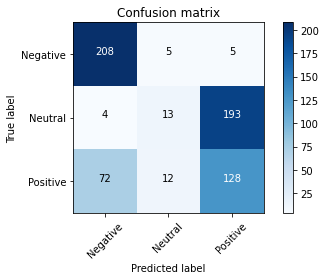

In [32]:
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1),preds)

print("Classification Report: ")
print(classification_report(Y_test.argmax(axis=1),preds))

F1_Score=f1_score(Y_test.argmax(axis=1),preds,average='weighted')
Precision=precision_score(Y_test.argmax(axis=1),preds,average='weighted')
Recall=recall_score(Y_test.argmax(axis=1),preds,average='weighted')
Accuracy= accuracy_score(Y_test.argmax(axis=1),preds)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]


results = results.append(pd.DataFrame([['ANN_adam','Original' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['ANN_adam','Original',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

In [33]:
#ANN Model 3 (Using l1 regularizer)
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Dense(15, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(6,kernel_regularizer=regularizers.l1(0.0001)))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics= ['accuracy'])

print("Training...")
model.fit(X_train,to_categorical(y_train), epochs=5, batch_size=16, validation_split=0.1)

print("Generating test predictions...")
preds = np.argmax(model.predict(X_test,verbose=1), axis=1)

Training...
Epoch 1/5
84/84 [==============================] - 6s 68ms/step - loss: 18821117501536.3750 - accuracy: 0.5076 - val_loss: 2506558537728.0000 - val_accuracy: 0.6333
Epoch 2/5
84/84 [==============================] - 0s 4ms/step - loss: 18163268110793.7891 - accuracy: 0.4839 - val_loss: 1270490988544.0000 - val_accuracy: 0.6333
Epoch 3/5
84/84 [==============================] - 0s 3ms/step - loss: 2387208695296.0000 - accuracy: 0.4932 - val_loss: 1440640794624.0000 - val_accuracy: 0.6067
Epoch 4/5
84/84 [==============================] - 0s 3ms/step - loss: 1712922486085.2705 - accuracy: 0.4567 - val_loss: 413778247680.0000 - val_accuracy: 0.7000
Epoch 5/5
84/84 [==============================] - 0s 4ms/step - loss: 1338360740129.1294 - accuracy: 0.6062 - val_loss: 2077580984320.0000 - val_accuracy: 0.6733


Generating test predictions...
20/20 [==============================] - 0s 2ms/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.98      0.83       218
           1       0.65      0.89      0.75       210
           2       0.68      0.19      0.30       212

    accuracy                           0.69       640
   macro avg       0.69      0.69      0.63       640
weighted avg       0.69      0.69      0.63       640

Confusion matrix, without normalization
[[213   4   1]
 [  5 187  18]
 [ 76  95  41]]


1         2         3
TPR  0.977064  0.890476  0.193396
FNR  0.022936  0.109524  0.806604
FPR  0.191943  0.230233  0.044393
TNR  0.808057  0.769767  0.955607

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0                  KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1        Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2       Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3          ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4             ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5   ANN_l1_regularizer  GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6   ANN_l2_regularizer  GAFeature-reduced  0.851562   0.852846  0.851562  0.845862
7                  KNN           Original  0.725000   0.713078  0.725000  0.709055
8        Random Forest           Original  0.987500   0.987561  0.987500  0.987506
9          ANN_rmsprop           Original  0.621875   0.615230  0.621875  0.603640
10            ANN_adam           Original  0.545312   0.521721  0.545312  0.475439
11  ANN_l1_regularizer           Original  0.689063   0.687677  0.689063  0.630690

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                  KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1        Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2       Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3          ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4             ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5   ANN_l1_regularizer  GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6   ANN_l2_regularizer  GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598
7                  KNN           Original  0.908257  0.838095  0.424528  0.091743  0.161905  0.575472  0.116114  0.174419  0.121495  0.883886  0.825581  0.878505
8        Random Forest           Original  0.990826  0.995238  0.976415  0.009174  0.004762  0.023585  0.011848  0.000000  0.007009  0.988152  1.000000  0.992991
9          ANN_rmsprop           Original  0.981651  0.366667  0.504717  0.018349  0.633333  0.495283  0.142180  0.111628  0.313084  0.857820  0.888372  0.686916
10            ANN_adam           Original  0.954128  0.061905  0.603774  0.045872  0.938095  0.396226  0.180095  0.039535  0.462617  0.819905  0.960465  0.537383
11  ANN_l1_regularizer           Original  0.977064  0.890476  0.193396  0.022936  0.109524  0.806604  0.191943  0.230233  0.044393  0.808057  0.769767  0.955607

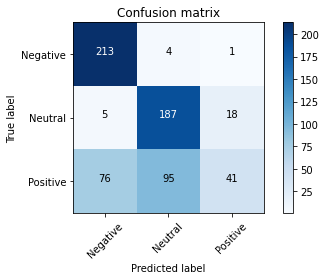

In [34]:
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1),preds)

print("Classification Report: ")
print(classification_report(Y_test.argmax(axis=1),preds))

F1_Score=f1_score(Y_test.argmax(axis=1),preds,average='weighted')
Precision=precision_score(Y_test.argmax(axis=1),preds,average='weighted')
Recall=recall_score(Y_test.argmax(axis=1),preds,average='weighted')
Accuracy= accuracy_score(Y_test.argmax(axis=1),preds)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]


results = results.append(pd.DataFrame([['ANN_l1_regularizer','Original' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['ANN_l1_regularizer','Original',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

In [35]:
#ANN Model 3 (Using l2 regularizer)
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Dense(256, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics= ['accuracy'])

print("Training...")
model.fit(X_train,to_categorical(y_train), epochs=5, batch_size=16, validation_split=0.1)

print("Generating test predictions...")
preds = np.argmax(model.predict(X_test,verbose=1), axis=1)

Training...
Epoch 1/5
84/84 [==============================] - 8s 93ms/step - loss: 43391083980197.6484 - accuracy: 0.5620 - val_loss: 23397950029824.0000 - val_accuracy: 0.5733
Epoch 2/5
84/84 [==============================] - 1s 17ms/step - loss: 53463615358277.2734 - accuracy: 0.6728 - val_loss: 9600130613248.0000 - val_accuracy: 0.6800
Epoch 3/5
84/84 [==============================] - 1s 13ms/step - loss: 47340147659860.3281 - accuracy: 0.5770 - val_loss: 16948889911296.0000 - val_accuracy: 0.6533
Epoch 4/5
84/84 [==============================] - 1s 12ms/step - loss: 73969406179062.9688 - accuracy: 0.5368 - val_loss: 2133271117824.0000 - val_accuracy: 0.7200
Epoch 5/5
84/84 [==============================] - 1s 11ms/step - loss: 41109371095305.0391 - accuracy: 0.6526 - val_loss: 1981262331904.0000 - val_accuracy: 0.6133


Generating test predictions...
20/20 [==============================] - 0s 5ms/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       218
           1       0.44      0.02      0.04       210
           2       0.40      0.66      0.50       212

    accuracy                           0.55       640
   macro avg       0.53      0.55      0.46       640
weighted avg       0.53      0.55      0.46       640

Confusion matrix, without normalization
[[211   2   5]
 [  4   4 202]
 [ 70   3 139]]


1         2         3
TPR  0.967890  0.019048  0.655660
FNR  0.032110  0.980952  0.344340
FPR  0.175355  0.011628  0.483645
TNR  0.824645  0.988372  0.516355

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0                  KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1        Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2       Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3          ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4             ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5   ANN_l1_regularizer  GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6   ANN_l2_regularizer  GAFeature-reduced  0.851562   0.852846  0.851562  0.845862
7                  KNN           Original  0.725000   0.713078  0.725000  0.709055
8        Random Forest           Original  0.987500   0.987561  0.987500  0.987506
9          ANN_rmsprop           Original  0.621875   0.615230  0.621875  0.603640
10            ANN_adam           Original  0.545312   0.521721  0.545312  0.475439
11  ANN_l1_regularizer           Original  0.689063   0.687677  0.689063  0.630690
12  ANN_l2_regularizer           Original  0.553125   0.531090  0.553125  0.462791

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                  KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1        Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2       Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3          ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4             ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5   ANN_l1_regularizer  GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6   ANN_l2_regularizer  GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598
7                  KNN           Original  0.908257  0.838095  0.424528  0.091743  0.161905  0.575472  0.116114  0.174419  0.121495  0.883886  0.825581  0.878505
8        Random Forest           Original  0.990826  0.995238  0.976415  0.009174  0.004762  0.023585  0.011848  0.000000  0.007009  0.988152  1.000000  0.992991
9          ANN_rmsprop           Original  0.981651  0.366667  0.504717  0.018349  0.633333  0.495283  0.142180  0.111628  0.313084  0.857820  0.888372  0.686916
10            ANN_adam           Original  0.954128  0.061905  0.603774  0.045872  0.938095  0.396226  0.180095  0.039535  0.462617  0.819905  0.960465  0.537383
11  ANN_l1_regularizer           Original  0.977064  0.890476  0.193396  0.022936  0.109524  0.806604  0.191943  0.230233  0.044393  0.808057  0.769767  0.955607
12  ANN_l2_regularizer           Original  0.967890  0.019048  0.655660  0.032110  0.980952  0.344340  0.175355  0.011628  0.483645  0.824645  0.988372  0.516355

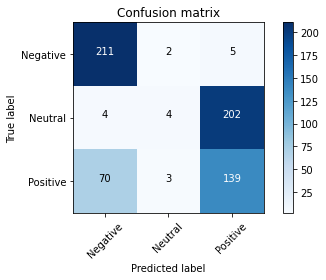

In [36]:
cnf_matrix = confusion_matrix(Y_test.argmax(axis=1),preds)

print("Classification Report: ")
print(classification_report(Y_test.argmax(axis=1),preds))

F1_Score=f1_score(Y_test.argmax(axis=1),preds,average='weighted')
Precision=precision_score(Y_test.argmax(axis=1),preds,average='weighted')
Recall=recall_score(Y_test.argmax(axis=1),preds,average='weighted')
Accuracy= accuracy_score(Y_test.argmax(axis=1),preds)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]


results = results.append(pd.DataFrame([['ANN_l2_regularizer','Original' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['ANN_l2_regularizer','Original',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

## Stage 4: Performance Evaluation

## Performance with selected features dataset and original dataset

The feature reduced data set is evaluated on the below mentioned metrics:
- Accuracy
- Precision
- Recall
- F1 Score
- TPR
- TNR
- FPR
- FNR

In [37]:
results
results_2

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0                  KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1        Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2       Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3          ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4             ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5   ANN_l1_regularizer  GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6   ANN_l2_regularizer  GAFeature-reduced  0.851562   0.852846  0.851562  0.845862
7                  KNN           Original  0.725000   0.713078  0.725000  0.709055
8        Random Forest           Original  0.987500   0.987561  0.987500  0.987506
9          ANN_rmsprop           Original  0.621875   0.615230  0.621875  0.603640
10            ANN_adam           Original  0.545312   0.521721  0.545312  0.475439
11  ANN_l1_regularizer           Original  0.689063   0.687677  0.689063  0.630690
12  ANN_l2_regularizer           Original  0.553125   0.531090  0.553125  0.462791

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                  KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1        Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2       Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3          ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4             ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5   ANN_l1_regularizer  GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6   ANN_l2_regularizer  GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598
7                  KNN           Original  0.908257  0.838095  0.424528  0.091743  0.161905  0.575472  0.116114  0.174419  0.121495  0.883886  0.825581  0.878505
8        Random Forest           Original  0.990826  0.995238  0.976415  0.009174  0.004762  0.023585  0.011848  0.000000  0.007009  0.988152  1.000000  0.992991
9          ANN_rmsprop           Original  0.981651  0.366667  0.504717  0.018349  0.633333  0.495283  0.142180  0.111628  0.313084  0.857820  0.888372  0.686916
10            ANN_adam           Original  0.954128  0.061905  0.603774  0.045872  0.938095  0.396226  0.180095  0.039535  0.462617  0.819905  0.960465  0.537383
11  ANN_l1_regularizer           Original  0.977064  0.890476  0.193396  0.022936  0.109524  0.806604  0.191943  0.230233  0.044393  0.808057  0.769767  0.955607
12  ANN_l2_regularizer           Original  0.967890  0.019048  0.655660  0.032110  0.980952  0.344340  0.175355  0.011628  0.483645  0.824645  0.988372  0.516355

In [38]:
results.to_pickle("Results1.pkl")
results_2.to_pickle("Results2.pkl")

In [50]:
results_2 = pd.read_pickle("Results2.pkl")
results_2

Model            Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                  KNN  GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1        Random Forest  GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2       Multiclass SVM  GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3          ANN_rmsprop  GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4             ANN_adam  GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5   ANN_l1_regularizer  GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6   ANN_l2_regularizer  GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598
7                  KNN           Original  0.908257  0.838095  0.424528  0.091743  0.161905  0.575472  0.116114  0.174419  0.121495  0.883886  0.825581  0.878505
8        Random Forest           Original  0.990826  0.995238  0.976415  0.009174  0.004762  0.023585  0.011848  0.000000  0.007009  0.988152  1.000000  0.992991
9          ANN_rmsprop           Original  0.981651  0.366667  0.504717  0.018349  0.633333  0.495283  0.142180  0.111628  0.313084  0.857820  0.888372  0.686916
10            ANN_adam           Original  0.954128  0.061905  0.603774  0.045872  0.938095  0.396226  0.180095  0.039535  0.462617  0.819905  0.960465  0.537383
11  ANN_l1_regularizer           Original  0.977064  0.890476  0.193396  0.022936  0.109524  0.806604  0.191943  0.230233  0.044393  0.808057  0.769767  0.955607
12  ANN_l2_regularizer           Original  0.967890  0.019048  0.655660  0.032110  0.980952  0.344340  0.175355  0.011628  0.483645  0.824645  0.988372  0.516355

In [52]:
results = pd.read_pickle("Results1.pkl")
results

Model            Dataset  Accuracy  Precision    Recall  F1 Score
0                  KNN  GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1        Random Forest  GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2       Multiclass SVM  GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3          ANN_rmsprop  GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4             ANN_adam  GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5   ANN_l1_regularizer  GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6   ANN_l2_regularizer  GAFeature-reduced  0.851562   0.852846  0.851562  0.845862
7                  KNN           Original  0.725000   0.713078  0.725000  0.709055
8        Random Forest           Original  0.987500   0.987561  0.987500  0.987506
9          ANN_rmsprop           Original  0.621875   0.615230  0.621875  0.603640
10            ANN_adam           Original  0.545312   0.521721  0.545312  0.475439
11  ANN_l1_regularizer           Original  0.689063   0.687677  0.689063  0.630690
12  ANN_l2_regularizer           Original  0.553125   0.531090  0.553125  0.462791

### Using PSO For Feature Reduction

In [41]:
df  = pd.read_csv('emotions.csv')

In [42]:
# Import PySwarms
import pyswarms as ps

X= df.drop(['label'],axis = 1)
y= df["label"]

X= X.values

In [43]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
# Create an instance of the classifier
classifier = DecisionTreeClassifier()

# Define objective function
def f_per_particle(m, alpha):
    total_features = 15
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    # Perform classification and store performance in P
    classifier.fit(X_subset, y)
    P = (classifier.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

def f(x, alpha=0.88):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [5]:
# Initialize swarm, arbitrary
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}

# Call instance of PSO
dimensions = X.shape[1] # dimensions should be the number of features
#optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=50, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=5, verbose=2)

2022-09-13 15:01:01,915 - pyswarms.discrete.binary - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary:   0%|          |0/5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pyswarms.discrete.binary:  20%|██        |1/5, best_cost=-10.5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pyswarms.discrete.binary:  40%|████      |2/5, best_cost=-12.6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pyswarms.discrete.binary:  60%|██████    |3/5, best_cost=-12.6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pyswarms.discrete.binary:  80%|████████  |4/5, best_cost=-12.6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pyswarms.discrete.binary: 100%|██████████|5/5, best_cost=-12.6
2022-09-13 15:12:16,349 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -12.648, best pos: [0 1 1 ... 1 0 1]


In [6]:
columns_just_pso = list()
print("Columns selected with just PSO:\n")

for x, y in zip(df.columns, pos):
    
    if y == 1:
        print(x)
        columns_just_pso.append(x)

Columns selected with just PSO:

mean_1_a
mean_2_a
mean_4_a
mean_d_0_a
mean_d_1_a
mean_d_3_a
mean_d_4_a
mean_d_0_a2
mean_d_1_a2
mean_d_2_a2
mean_d_4_a2
mean_d_6_a
mean_d_8_a
mean_d_10_a
mean_d_11_a
mean_d_13_a
mean_d_16_a
mean_d_20_a
mean_d_21_a
mean_d_23_a
mean_d_25_a
mean_d_26_a
mean_d_27_a
mean_d_29_a
mean_d_30_a
mean_d_31_a
mean_d_32_a
mean_d_35_a
mean_d_36_a
mean_d_38_a
mean_d_39_a
mean_d_41_a
mean_d_42_a
mean_d_44_a
mean_d_48_a
mean_d_49_a
stddev_0_a
stddev_1_a
stddev_3_a
stddev_4_a
stddev_d_0_a
stddev_d_1_a
stddev_d_2_a
stddev_d_3_a
moments_0_a
moments_1_a
moments_2_a
moments_8_a
moments_9_a
moments_11_a
moments_13_a
moments_15_a
moments_17_a
max_1_a
max_2_a
max_4_a
max_d_2_a
max_d_3_a
max_d_4_a
max_q_0_a
max_q_2_a
max_q_3_a
max_q_4_a
max_q_7_a
max_q_8_a
max_q_10_a
max_q_12_a
max_q_15_a
max_q_19_a
max_q_20_a
max_q_22_a
max_q_23_a
max_q_26_a
max_q_27_a
max_q_30_a
max_q_33_a
max_q_34_a
max_q_35_a
max_q_36_a
max_q_37_a
max_q_39_a
max_q_40_a
max_q_41_a
max_q_42_a
max_q_47_a
max_q_49

fft_247_b
fft_248_b
fft_249_b
fft_251_b
fft_253_b
fft_254_b
fft_256_b
fft_257_b
fft_258_b
fft_259_b
fft_260_b
fft_261_b
fft_262_b
fft_263_b
fft_264_b
fft_265_b
fft_266_b
fft_267_b
fft_269_b
fft_270_b
fft_271_b
fft_275_b
fft_276_b
fft_277_b
fft_279_b
fft_280_b
fft_281_b
fft_283_b
fft_286_b
fft_287_b
fft_289_b
fft_290_b
fft_291_b
fft_292_b
fft_293_b
fft_294_b
fft_295_b
fft_296_b
fft_298_b
fft_299_b
fft_301_b
fft_302_b
fft_304_b
fft_305_b
fft_306_b
fft_308_b
fft_309_b
fft_310_b
fft_312_b
fft_314_b
fft_315_b
fft_317_b
fft_319_b
fft_320_b
fft_321_b
fft_322_b
fft_323_b
fft_325_b
fft_329_b
fft_330_b
fft_332_b
fft_333_b
fft_339_b
fft_343_b
fft_344_b
fft_346_b
fft_348_b
fft_350_b
fft_351_b
fft_352_b
fft_353_b
fft_356_b
fft_357_b
fft_358_b
fft_360_b
fft_361_b
fft_362_b
fft_364_b
fft_365_b
fft_366_b
fft_367_b
fft_368_b
fft_370_b
fft_371_b
fft_376_b
fft_379_b
fft_381_b
fft_382_b
fft_383_b
fft_384_b
fft_385_b
fft_386_b
fft_388_b
fft_389_b
fft_390_b
fft_391_b
fft_394_b
fft_395_b
fft_396_b
fft_397_b


In [7]:
len(columns_just_pso)
print(columns_just_pso)

['mean_1_a', 'mean_2_a', 'mean_4_a', 'mean_d_0_a', 'mean_d_1_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2', 'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_4_a2', 'mean_d_6_a', 'mean_d_8_a', 'mean_d_10_a', 'mean_d_11_a', 'mean_d_13_a', 'mean_d_16_a', 'mean_d_20_a', 'mean_d_21_a', 'mean_d_23_a', 'mean_d_25_a', 'mean_d_26_a', 'mean_d_27_a', 'mean_d_29_a', 'mean_d_30_a', 'mean_d_31_a', 'mean_d_32_a', 'mean_d_35_a', 'mean_d_36_a', 'mean_d_38_a', 'mean_d_39_a', 'mean_d_41_a', 'mean_d_42_a', 'mean_d_44_a', 'mean_d_48_a', 'mean_d_49_a', 'stddev_0_a', 'stddev_1_a', 'stddev_3_a', 'stddev_4_a', 'stddev_d_0_a', 'stddev_d_1_a', 'stddev_d_2_a', 'stddev_d_3_a', 'moments_0_a', 'moments_1_a', 'moments_2_a', 'moments_8_a', 'moments_9_a', 'moments_11_a', 'moments_13_a', 'moments_15_a', 'moments_17_a', 'max_1_a', 'max_2_a', 'max_4_a', 'max_d_2_a', 'max_d_3_a', 'max_d_4_a', 'max_q_0_a', 'max_q_2_a', 'max_q_3_a', 'max_q_4_a', 'max_q_7_a', 'max_q_8_a', 'max_q_10_a', 'max_q_12_a', 'max_q_15_a', 'max_q_19_a', 'max_q_20

In [47]:
df_new=df[columns_just_pso]
df_new['label']= df['label']
df_new.head()
df_new.shape

mean_1_a  mean_2_a  mean_4_a  mean_d_0_a  mean_d_1_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  mean_d_4_a2  mean_d_6_a  mean_d_8_a  mean_d_10_a  mean_d_11_a  mean_d_13_a  mean_d_16_a  mean_d_20_a  mean_d_21_a  mean_d_23_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_35_a  mean_d_36_a  mean_d_38_a  mean_d_39_a  mean_d_41_a  mean_d_42_a  mean_d_44_a  mean_d_48_a  mean_d_49_a  stddev_0_a  stddev_1_a  stddev_3_a  stddev_4_a  stddev_d_0_a  stddev_d_1_a  stddev_d_2_a  stddev_d_3_a  moments_0_a  moments_1_a  moments_2_a  moments_8_a  moments_9_a  moments_11_a  moments_13_a  moments_15_a  moments_17_a  max_1_a  max_2_a  max_4_a  max_d_2_a  max_d_3_a  max_d_4_a  max_q_0_a  max_q_2_a  max_q_3_a  max_q_4_a  max_q_7_a  max_q_8_a  max_q_10_a  max_q_12_a  max_q_15_a  max_q_19_a  max_q_20_a  max_q_22_a  max_q_23_a  max_q_26_a  max_q_27_a  max_q_30_a  max_q_33_a  max_q_34_a  max_q_35_a  max_q_36_a  max_q_37_a  max_q_39_a  \
0      30.3    -356.0      26.3       1.070       0.411        2.06        3.15         2.15         29.5       -353.0         21.5        30.7        14.7         3.17         32.2         15.9         28.8      -3.8300       -1.230       -0.363        -1.03       -2.780        14.60   -14.900000        -4.94        0.664         5.82         2.80       -1.550        -1.18        -8.51        1.890        16.60       8.3100       -1.370       16.800        28.1        7.80       39.90        36.1        -1.690        -0.876          8.12         -1.72      10000.0        57.40    4170000.0    4130000.0    5460000.0       34000.0  1.840000e+08  2.270000e+09  4.470000e+14     52.0    131.0    137.0     -94.20      -9.62      -5.81       53.9      131.0       93.6      137.0       16.5       82.7        57.3        21.9        61.4       131.0       -6.54      114.00       10.90       -2.73      109.00       -7.50        9.62        5.81        3.10       -8.07       -5.38        2.46   
1      33.1      32.0      22.8       6.550       1.680        3.83       -4.82        25.60         32.8         29.6         17.4        31.7        26.2        31.80         33.1         28.5         34.7       0.0342        1.100       -4.690        -6.22       -0.328        -3.53    -9.370000        -6.85       -1.890        -4.13        -6.25       -1.430        -2.28         6.07       -3.000        -2.26      18.6000        1.520       12.600         7.1        3.55        6.51        33.1        -0.525        -0.516         -1.91         -1.67         21.8       -18.20       -344.0       5480.0    3520000.0       -1860.0 -9.120000e+03  1.190000e+06  1.580000e+07     41.6     52.6     96.3       1.62      -2.31      -6.09       44.2       48.1       42.8       63.5       50.9       37.1        43.8        49.4        45.4        89.7        9.45       -2.82        5.74        1.07       -1.27       -1.15        5.21      -26.20       -9.04        2.62        1.55        6.09   
2      29.4    -416.0      23.7      79.900       3.360       89.90        2.03         7.75         30.1       -441.0         25.3        25.3       -65.4        79.80         31.0         91.9         31.1      76.6000        4.850       75.300       -72.00       -0.843       -33.00    -4.200000       -11.00       -0.972      -106.00      -149.00       -5.690      -157.00        -9.48       -5.820      -146.00       0.0884       59.800        9.560        70.4        4.12       71.50        30.6       -34.200        -2.280         23.00        -36.70    -387000.0       -89.00    -937000.0  112000000.0    2630000.0      -15500.0 -1.680000e+10  3.120000e+12  2.120000e+14     38.0    -43.9    103.0     118.00      36.50      23.60       32.6     -178.0       24.6       78.2     -162.0       90.7       129.0       -43.9        51.2       103.0      -60.00      -16.50      -66.10        1.26     -134.00      -18.60      -23.70      -24.70      -35.90       -1.94     -118.00       -4.77   

(2132, 1597)

In [48]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X= df_new.drop(['label'],axis = 1)
y= df_new["label"]
X_train_1,X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.30, random_state=1)

### KNN for feature reduced(PSO) dataset

KNeighborsClassifier(n_jobs=16)

Classification Report: 
              precision    recall  f1-score   support

    NEGATIVE       0.80      0.91      0.85       218
     NEUTRAL       0.78      0.86      0.82       210
    POSITIVE       0.71      0.53      0.61       212

    accuracy                           0.77       640
   macro avg       0.76      0.77      0.76       640
weighted avg       0.76      0.77      0.76       640

Confusion matrix, without normalization
[[198   1  19]
 [  1 181  28]
 [ 50  49 113]]


1         2         3
TPR  0.908257  0.861905  0.533019
FNR  0.091743  0.138095  0.466981
FPR  0.120853  0.116279  0.109813
TNR  0.879147  0.883721  0.890187

Model             Dataset  Accuracy  Precision    Recall  F1 Score
0                  KNN   GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1        Random Forest   GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2       Multiclass SVM   GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3          ANN_rmsprop   GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4             ANN_adam   GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5   ANN_l1_regularizer   GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6   ANN_l2_regularizer   GAFeature-reduced  0.851562   0.852846  0.851562  0.845862
7                  KNN            Original  0.725000   0.713078  0.725000  0.709055
8        Random Forest            Original  0.987500   0.987561  0.987500  0.987506
9          ANN_rmsprop            Original  0.621875   0.615230  0.621875  0.603640
10            ANN_adam            Original  0.545312   0.521721  0.545312  0.475439
11  ANN_l1_regularizer            Original  0.689063   0.687677  0.689063  0.630690
12  ANN_l2_regularizer            Original  0.553125   0.531090  0.553125  0.462791
13                 KNN  PSOFeature-reduced  0.768750   0.761906  0.768750  0.759427

Model             Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                  KNN   GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1        Random Forest   GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2       Multiclass SVM   GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3          ANN_rmsprop   GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4             ANN_adam   GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5   ANN_l1_regularizer   GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6   ANN_l2_regularizer   GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598
7                  KNN            Original  0.908257  0.838095  0.424528  0.091743  0.161905  0.575472  0.116114  0.174419  0.121495  0.883886  0.825581  0.878505
8        Random Forest            Original  0.990826  0.995238  0.976415  0.009174  0.004762  0.023585  0.011848  0.000000  0.007009  0.988152  1.000000  0.992991
9          ANN_rmsprop            Original  0.981651  0.366667  0.504717  0.018349  0.633333  0.495283  0.142180  0.111628  0.313084  0.857820  0.888372  0.686916
10            ANN_adam            Original  0.954128  0.061905  0.603774  0.045872  0.938095  0.396226  0.180095  0.039535  0.462617  0.819905  0.960465  0.537383
11  ANN_l1_regularizer            Original  0.977064  0.890476  0.193396  0.022936  0.109524  0.806604  0.191943  0.230233  0.044393  0.808057  0.769767  0.955607
12  ANN_l2_regularizer            Original  0.967890  0.019048  0.655660  0.032110  0.980952  0.344340  0.175355  0.011628  0.483645  0.824645  0.988372  0.516355
13                 KNN  PMOFeature-reduced  0.908257  0.861905  0.533019  0.091743  0.138095  0.466981  0.120853  0.116279  0.109813  0.879147  0.883721  0.890187

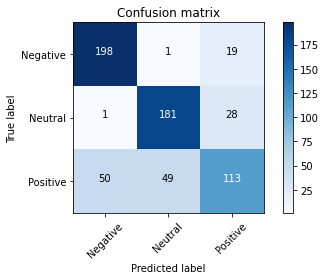

In [53]:
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn.fit(X_train_1,y_train_1)

y_pred_knn= knn.predict(X_test_1)

F1_Score=f1_score(y_test_1,y_pred_knn,average='weighted')
Precision=precision_score(y_test_1,y_pred_knn,average='weighted')
Recall=recall_score(y_test_1,y_pred_knn,average='weighted')
Accuracy= accuracy_score(y_test_1,y_pred_knn)

print("Classification Report: ")
print(classification_report(y_test_1,y_pred_knn))

cnf_matrix = confusion_matrix(y_test_1,y_pred_knn)

plot_confusion_matrix(cnf_matrix)


df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]
results = results.append(pd.DataFrame([['KNN','PSOFeature-reduced' ,Accuracy, Precision, Recall, F1_Score]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results

results_2= results_2.append(pd.DataFrame([['KNN','PMOFeature-reduced',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),ignore_index = True)
results_2



### Random Forest for feature reduced (PSO) dataset

Classification Report: 
              precision    recall  f1-score   support

    NEGATIVE       0.98      0.99      0.99       218
     NEUTRAL       1.00      1.00      1.00       210
    POSITIVE       0.99      0.98      0.99       212

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640

Confusion matrix, without normalization
[[216   0   2]
 [  0 210   0]
 [  4   0 208]]


1    2         3
TPR  0.990826  1.0  0.981132
FNR  0.009174  0.0  0.018868
FPR  0.009479  0.0  0.004673
TNR  0.990521  1.0  0.995327

Model             Dataset  Accuracy  Precision    Recall  F1 Score
0                  KNN   GAFeature-reduced  0.907813   0.910513  0.907813  0.905464
1        Random Forest   GAFeature-reduced  0.982812   0.982945  0.982812  0.982790
2       Multiclass SVM   GAFeature-reduced  0.914062   0.913946  0.914062  0.913975
3          ANN_rmsprop   GAFeature-reduced  0.329688   0.161779  0.329688  0.169765
4             ANN_adam   GAFeature-reduced  0.815625   0.812782  0.815625  0.811227
5   ANN_l1_regularizer   GAFeature-reduced  0.831250   0.836533  0.831250  0.822204
6   ANN_l2_regularizer   GAFeature-reduced  0.851562   0.852846  0.851562  0.845862
7                  KNN            Original  0.725000   0.713078  0.725000  0.709055
8        Random Forest            Original  0.987500   0.987561  0.987500  0.987506
9          ANN_rmsprop            Original  0.621875   0.615230  0.621875  0.603640
10            ANN_adam            Original  0.545312   0.521721  0.545312  0.475439
11  ANN_l1_regularizer            Original  0.689063   0.687677  0.689063  0.630690
12  ANN_l2_regularizer            Original  0.553125   0.531090  0.553125  0.462791
13                 KNN  PSOFeature-reduced  0.768750   0.761906  0.768750  0.759427
14       Random Forest  PMOFeature-reduced  0.990625   0.990652  0.990625  0.990624

Model             Dataset     TPR_0     TPR_1     TPR_2     FNR_0     FNR_1     FNR_2     FPR_0     FPR_1     FPR_2     TNR_0     TNR_1     TNR_2
0                  KNN   GAFeature-reduced  0.958716  0.990476  0.773585  0.041284  0.009524  0.226415  0.075829  0.037209  0.025701  0.924171  0.962791  0.974299
1        Random Forest   GAFeature-reduced  0.990826  0.995238  0.962264  0.009174  0.004762  0.037736  0.016588  0.002326  0.007009  0.983412  0.997674  0.992991
2       Multiclass SVM   GAFeature-reduced  0.912844  0.966667  0.863208  0.087156  0.033333  0.136792  0.052133  0.016279  0.060748  0.947867  0.983721  0.939252
3          ANN_rmsprop   GAFeature-reduced  0.009174  0.995238  0.000000  0.990826  0.004762  1.000000  0.026066  0.972093  0.000000  0.973934  0.027907  1.000000
4             ANN_adam   GAFeature-reduced  0.866972  0.938095  0.641509  0.133028  0.061905  0.358491  0.120853  0.062791  0.093458  0.879147  0.937209  0.906542
5   ANN_l1_regularizer   GAFeature-reduced  0.963303  0.938095  0.589623  0.036697  0.061905  0.410377  0.137441  0.067442  0.049065  0.862559  0.932558  0.950935
6   ANN_l2_regularizer   GAFeature-reduced  0.912844  0.980952  0.660377  0.087156  0.019048  0.339623  0.104265  0.067442  0.051402  0.895735  0.932558  0.948598
7                  KNN            Original  0.908257  0.838095  0.424528  0.091743  0.161905  0.575472  0.116114  0.174419  0.121495  0.883886  0.825581  0.878505
8        Random Forest            Original  0.990826  0.995238  0.976415  0.009174  0.004762  0.023585  0.011848  0.000000  0.007009  0.988152  1.000000  0.992991
9          ANN_rmsprop            Original  0.981651  0.366667  0.504717  0.018349  0.633333  0.495283  0.142180  0.111628  0.313084  0.857820  0.888372  0.686916
10            ANN_adam            Original  0.954128  0.061905  0.603774  0.045872  0.938095  0.396226  0.180095  0.039535  0.462617  0.819905  0.960465  0.537383
11  ANN_l1_regularizer            Original  0.977064  0.890476  0.193396  0.022936  0.109524  0.806604  0.191943  0.230233  0.044393  0.808057  0.769767  0.955607
12  ANN_l2_regularizer            Original  0.967890  0.019048  0.655660  0.032110  0.980952  0.344340  0.175355  0.011628  0.483645  0.824645  0.988372  0.516355
13                 KNN  PMOFeature-reduced  0.908257  0.861905  0.533019  0.091743  0.138095  0.466981  0.120853  0.116279  0.109813  0.879147  0.883721  0.890187
14       Random Forest  PMOFeature-reduced  0.990826  1.000000  0.981132  0.009174  0.000000  0.018868  0.009479  0.000000  0.004673  0.990521  1.000000  0.995327

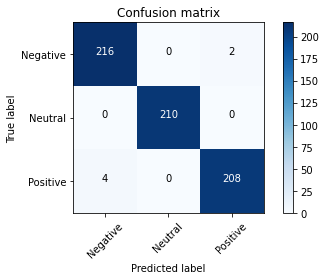

In [54]:
rf= RandomForestClassifier(n_estimators=400,random_state=10).fit(X_train_1,y_train_1)
y_pred=rf.predict(X_test_1)

cnf_matrix = confusion_matrix(y_test_1,y_pred)

print("Classification Report: ")
print(classification_report(y_test_1,y_pred))

F1_Score=f1_score(y_test_1,y_pred,average='weighted')
Precision=precision_score(y_test_1,y_pred,average='weighted')
Recall=recall_score(y_test_1,y_pred,average='weighted')
Accuracy= accuracy_score(y_test_1,y_pred)

plot_confusion_matrix(cnf_matrix)

df_eval=pd.DataFrame(get_tpr_fnr_fpr_tnr(cnf_matrix))
df_eval

TPR_0= df_eval.loc['TPR',"1"]
TPR_1=df_eval.loc['TPR',"2"]
TPR_2 = df_eval.loc['TPR',"3"]

FNR_0 = df_eval.loc['FNR',"1"]
FNR_1 = df_eval.loc['FNR',"2"]
FNR_2 = df_eval.loc['FNR',"3"]

FPR_0 = df_eval.loc['FPR',"1"]
FPR_1 = df_eval.loc['FPR',"2"]
FPR_2 = df_eval.loc['FPR',"3"]

TNR_0 = df_eval.loc['TNR',"1"]
TNR_1 = df_eval.loc['TNR',"2"]
TNR_2 = df_eval.loc['TNR',"3"]

results = results.append(pd.DataFrame([['Random Forest','PMOFeature-reduced' ,Accuracy, Precision, Recall, F1_Score ]],
               columns = ['Model','Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),ignore_index = True)

results
                                       
results_2= results_2.append(pd.DataFrame([['Random Forest','PMOFeature-reduced',TPR_0, TPR_1,TPR_2,FNR_0,FNR_1,FNR_2,FPR_0,FPR_1,FPR_2,TNR_0,TNR_1,TNR_2 ]],
                        columns= ['Model','Dataset','TPR_0', 'TPR_1','TPR_2','FNR_0','FNR_1','FNR_2','FPR_0','FPR_1','FPR_2','TNR_0','TNR_1','TNR_2']),
                                       ignore_index=True)
results_2

In [55]:
results.to_pickle("Results1_afterPSO.pkl")
results_2.to_pickle("Results2_afterPSO.pkl")